<a href="https://colab.research.google.com/github/baschoff/Data-Science-Project/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration
## Team Information
  - Louis Jensen - ljesen1@angelo.edu

  - Brandon Aschoff - baschoff@angelo.edu

  Class 4330-010 Introduction to Data Science

## What is an Index?
All but 3 of our datasets are indexs. An index does not measure dollar values directly, but rather chooses a base value (100 for most of our datasets), and sets it as the default point, meaning all future numbers are a certain percentage of this number. This means that if a dataset has an index value of 110 at a specific date, then the price was 10% higher than the default point's price during that measurement. This means that a large portion of our graphs are technically unitless, as a percentage alone does not have any units associated with it. I was also unable to find the actualy base value for the indexs used, I could only find the date they were set at.

## Datasets Used
  - Zillow: A dataset full of Zillow's "Zestimates" for houses, there approximation of house prices in each state measured monthly since January of 2000. This is actual dollar values.
    - https://www.kaggle.com/datasets/robikscube/zillow-home-value-index
  - ComRealPri: Sale prices of real estate across the United States measured quarterly since January 2005. This is an index.
    - https://fred.stlouisfed.org/series/COMREPUSQ159N
  - StickyPrice: A dataset containing the actual percentage of inflation gathered monthly since January 1968. This is an index.
    - https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL
  - Inflation: An inflation dataset measured monthly since January 1947. This is not an index, but represents a percent change of a value, so extremely similar.
    - https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present
  - PPI_Glass: Producer Price Index for glass starting measured monthly since December 2003. This is an index.
    - https://fred.stlouisfed.org/series/PCU3272132721
  - PPI_Lumber: Producer Price Index for lumber starting measured monthly since January 1926. This is an index.
    - https://fred.stlouisfed.org/series/WPU08
  - PPI_Asphalt: Producer Price Index for Asphalt and Shingles, they are in the same dataset for some reason. measured monthly since December 1975. This is an index.
    - https://fred.stlouisfed.org/series/PCU324122324122
  - PPI_Cement: Producer Price Index for Cement and Concrete, these make sense in the same dataset, measured monthly since December 2003. This is an index.
    - https://fred.stlouisfed.org/series/PCU32733273
  - PPI_Plumbing: Producer Price Index for Plumbing Materials, measured monthly since January 1947. This is an index.
    - https://fred.stlouisfed.org/series/PCU332913332913
  - PPI_Metals:  Producer Price Index for all metals measured monthly since December 2010. This is an index.
    - https://fred.stlouisfed.org/series/WPU10170502

## Imports and Read in of Datasets

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

!git clone https://github.com/baschoff/Data-Science-Project.git

Zillow = pd.read_csv('/content/Data-Science-Project/Datasets/ZHVI.csv')
ComRealPri = pd.read_csv('/content/Data-Science-Project/Datasets/Commercial Real Estate.csv')
StickyPrice = pd.read_csv('/content/Data-Science-Project/Datasets/Sticky Price.csv')
Inflation = pd.read_csv('/content/Data-Science-Project/Datasets/US_inflation_rates.csv')
PPI_Glass = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Glass.csv')
PPI_Lumber = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Lumber.csv')
PPI_Asphalt = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Asphalt+Shingles.csv')
PPI_Cement = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Cement+Concrete.csv')
PPI_Plumbing = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Plumbing.csv')
PPI_Metals = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Metal.csv')

PPI_Glass.rename(columns = {"PCU3272132721": "Price"}, inplace = True)
PPI_Lumber.rename(columns = {"WPU08": "Price"}, inplace = True)
PPI_Asphalt.rename(columns = {"PCU324122324122": "Price"}, inplace = True)
PPI_Cement.rename(columns = {"PCU32733273": "Price"}, inplace = True)
PPI_Plumbing.rename(columns = {"PCU332913332913": "Price"}, inplace = True)
PPI_Metals.rename(columns = {"WPU10170502": "Price"}, inplace = True)
StickyPrice.rename(columns = {"CORESTICKM159SFRBATL" : "Value"}, inplace = True)
ComRealPri.rename(columns = {"COMREPUSQ159N" : "Value"}, inplace = True)
Zillow.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)
Inflation.rename(columns = {"DATE": "Date"}, inplace = True)
Inflation.rename(columns = {"DFF": "Value"}, inplace = True)

cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()

#print(PPI_Cement) #Debugging Print Statement

fatal: destination path 'Data-Science-Project' already exists and is not an empty directory.


# (1) Numerical and Categorical Features - BA
Description of the Numerical and Categorical Features within the datasets

## Identify catagorical and numerical features
Our data consists of dates, prices, and states
### Categorical

The categorical data in our datasets consists of dates and states. All of our datasets have a date column. The Zillow dataset is the only dataset with a different piece categorical data, it contains one column for every state in the United States.

### Numerical
Our only piece of numerical data is the price. Every dataset has a date and the price of the item that datasets corresponds to at that date, or the increase of that price.

### Values and Ranges
In the code cell below I will display each datasets range of values except for Zillow, it will be dealt with a bit later.

In [ ]:
PPI_Glass_min = PPI_Glass['Price'].min()
PPI_Glass_max = PPI_Glass['Price'].max()
PPI_Lumber_min = PPI_Lumber['Price'].min()
PPI_Lumber_max = PPI_Lumber['Price'].max()
PPI_Asphalt_min = PPI_Asphalt['Price'].min()
PPI_Asphalt_max = PPI_Asphalt['Price'].max()
PPI_Cement_min = PPI_Cement['Price'].min()
PPI_Cement_max = PPI_Cement['Price'].max()
PPI_Plumbing_min = PPI_Plumbing['Price'].min()
PPI_Plumbing_max = PPI_Plumbing['Price'].max()
PPI_Metals_min = PPI_Metals['Price'].min()
PPI_Metals_max = PPI_Metals['Price'].max()
StickyPrice_min = StickyPrice['Value'].min()
StickyPrice_max = StickyPrice['Value'].max()
ComRealPri_min = ComRealPri['Value'].min()
ComRealPri_max = ComRealPri['Value'].max()
Inflation_min = Inflation['value'].min()
Inflation_max = Inflation['value'].max()

print(f"PPI_Glass's    lowest Price is {PPI_Glass_min:.2f}  and its highest value is {PPI_Glass_max:.2f}")
print(f"PPI_Lumber's   lowest Price is {PPI_Lumber_min:.2f}   and its highest value is {PPI_Lumber_max:.2f}")
print(f"PPI_Asphalt's  lowest Price is {PPI_Asphalt_min:.2f}  and its highest value is {PPI_Asphalt_max:.2f}")
print(f"PPI_Cement's   lowest Price is {PPI_Cement_min:.2f} and its highest value is {PPI_Cement_max:.2f}")
print(f"PPI_Plumbing's lowest Price is {PPI_Plumbing_min:.2f}  and its highest value is {PPI_Plumbing_max:.2f}")
print(f"PPI_Metals's   lowest Price is {PPI_Metals_min:.2f}  and its highest value is {PPI_Metals_max:.2f}")
print(f"StickyPrice's  lowest Price is {StickyPrice_min:.2f}   and its highest value is {StickyPrice_max:.2f}")
print(f"ComRealPri's   lowest Price is {ComRealPri_min:.2f} and its highest value is {ComRealPri_max:.2f}")
print(f"Inflation's    lowest Price is {Inflation_min:.2f}  and its highest value is {Inflation_max:.2f}")

PPI_Glass's    lowest Price is 99.70  and its highest value is 171.69
PPI_Lumber's   lowest Price is 5.30   and its highest value is 372.86
PPI_Asphalt's  lowest Price is 58.40  and its highest value is 352.30
PPI_Cement's   lowest Price is 100.00 and its highest value is 248.84
PPI_Plumbing's lowest Price is 17.40  and its highest value is 371.57
PPI_Metals's   lowest Price is 83.80  and its highest value is 209.58
StickyPrice's  lowest Price is 0.66   and its highest value is 15.77
ComRealPri's   lowest Price is -30.40 and its highest value is 15.92
Inflation's    lowest Price is 21.48  and its highest value is 303.84


These results show that strangely, ComrealPri, although being an index, managed to achieve a negative value. Of the others, only Cement never dropped below its base values.

### Zillow
The Zillow dataset is far bigger than the other datasets, so the best way to visualize it is through .describe from Pandas. I also am truncating all numbers to only have 2 decimal points.

In [110]:
def format_describe(x):
    if isinstance(x, (np.floating, float)):
        return f'{x:.2f}'
    return x

Zillow.describe(include='all').map(format_describe)

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,296.00,...,297.00,297.00,297.00,297.00,270.00,297.00,296.00,297.00,297.00,297.00
unique,297,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2000-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,242488.31,429145.13,207179.48,288656.41,322526.22,170325.95,147371.77,365521.56,233011.82,...,122494.35,147074.45,132035.81,250994.49,227735.07,122222.99,174020.48,151438.91,136942.68,137675.35
std,nan,63730.11,156266.88,79452.69,77960.39,79099.36,58160.31,40109.98,99571.81,89852.06,...,31943.86,38018.71,35251.78,58175.47,53584.35,32100.63,56257.25,41923.50,33495.73,32365.92
min,nan,123345.47,187686.83,106914.49,152590.52,168867.68,111067.07,94106.30,194441.92,134673.83,...,84888.60,96355.62,87834.71,147889.12,143894.46,81317.07,107542.72,107906.33,91262.66,105495.85
25%,nan,214351.97,301556.59,144823.91,253787.07,278516.15,132901.50,121184.68,303774.76,160742.17,...,104538.12,123671.96,112836.89,216604.69,200597.70,103589.95,138535.78,125520.84,117911.36,116621.97
50%,nan,237064.01,412385.37,188508.75,273168.67,310641.73,141492.32,139304.56,341643.68,207504.59,...,109412.20,134960.05,118984.89,246237.74,214299.00,110293.63,150640.97,131850.81,122889.18,126542.66
75%,nan,265324.56,523548.17,243882.46,326718.84,357889.49,201412.42,160608.48,412832.63,272287.70,...,132860.29,157237.97,143458.38,273233.50,245455.18,130922.18,199129.85,168436.58,152967.51,143455.34


.describe doesn't show us everything for every column as the dataset has to many columns, but it does still let us get a general idea of what the dataset looks like.

# (2) Single Feauture Plots - BA
Displays at least one of the following for each of out datasets: Histplot, Kdeplot, countplot, boxplot, or violinplot. All of our dataset's except for Zillow and Sticky Price are index's. They are therefore unitless. All measurements ended in August of 2024 unless otherwise stated.

### Glass Price by Date
The price of glass, from 2003 until 2024 as an index.

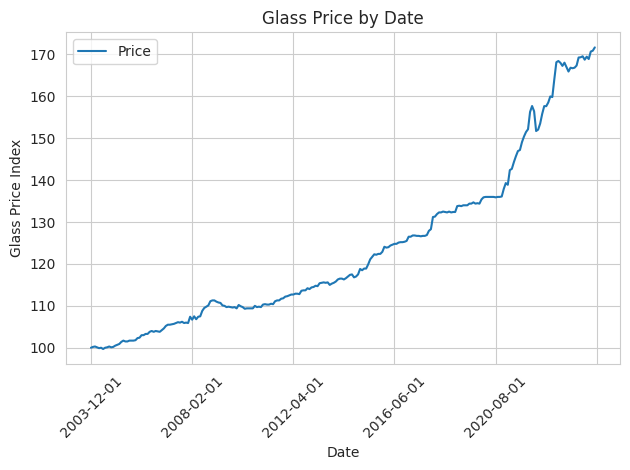

In [ ]:
PPI_Glass.plot.line(x=cN[0], y=cN[1])
plt.title('Glass Price by Date')
plt.xlabel('Date')
plt.ylabel('Glass Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

This shows that from the starting point in 2003, glass has only really increased in price, with any dips being short lived.

### Lumber Price by Date
The PPI_Lumber Index with measurements beginning in 1927.

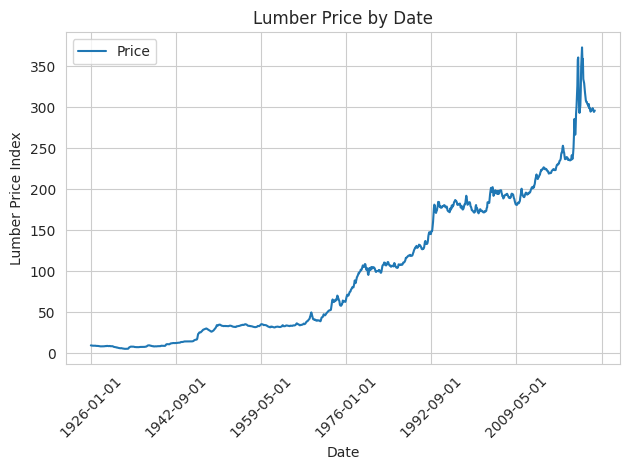

In [ ]:
PPI_Lumber.plot.line(x=cN1[0], y=cN1[1])
plt.title('Lumber Price by Date')
plt.xlabel('Date')
plt.ylabel('Lumber Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

Lumber has by far the most measurements of all of our datasets. It's price seems to have been very stable until around 1970.

### Asphalt Price by Date
The PPI_Asphalt Index with measurements beginning in 1975.

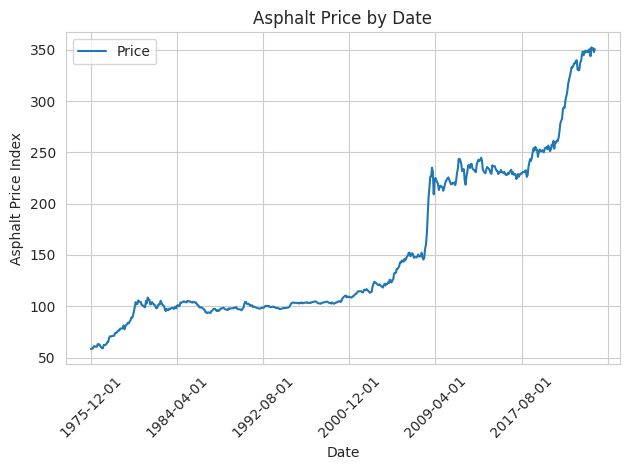

In [ ]:
PPI_Asphalt.plot.line(x=cN2[0], y=cN2[1])
plt.title('Asphalt Price by Date')
plt.xlabel('Date')
plt.ylabel('Asphalt Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

Asphalt has was not as stable as Lumber. It exihibits two major jumps.

### Cement Price by Date
The PPI_Cement Index with measurements beginning in 2003.

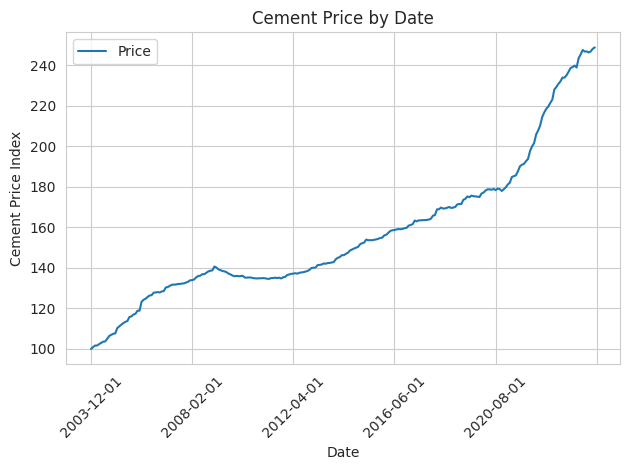

In [ ]:
PPI_Cement.plot.line(x=cN3[0], y=cN3[1])
plt.title('Cement Price by Date')
plt.xlabel('Date')
plt.ylabel('Cement Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

As we saw earlier, Cement is the only dataset that never drops below 100. besides that, it behaves as expected.

### Plumbing Materials Price by Date
The PPI_Plumbing Index with measurements beginning in 1947.

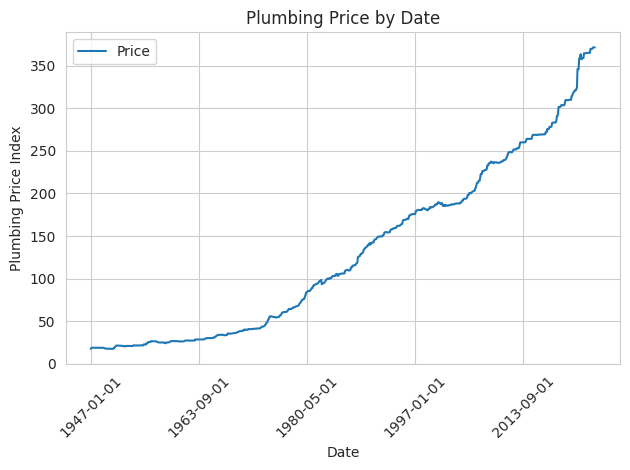

In [ ]:
PPI_Plumbing.plot.line(x=cN4[0], y=cN4[1])
plt.title('Plumbing Price by Date')
plt.xlabel('Date')
plt.ylabel('Plumbing Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

Nothing super special here, Plumbing follows a consistent trend


### Metals Price by Date
The PPI_Metals Index with measurements beginning in 2010.

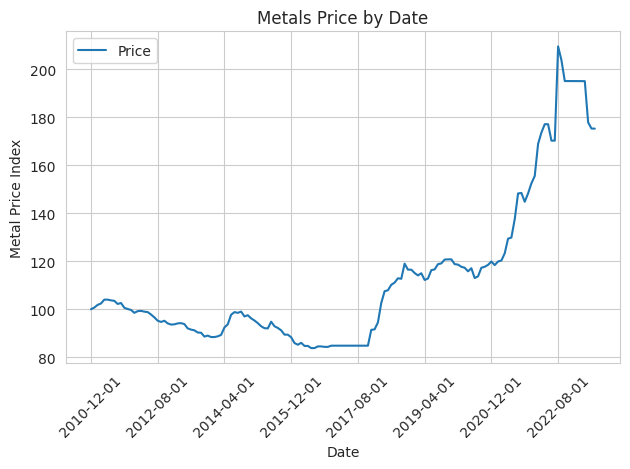

In [ ]:
PPI_Metals.plot.line(x=cN5[0], y=cN5[1])
plt.title('Metals Price by Date')
plt.xlabel('Date')
plt.ylabel('Metal Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

Of all the datasets, metals has the most downward trends, with several long streteches of decreasing prices

### Inflation by Date
Inflation by date, these are actual percentage increases.

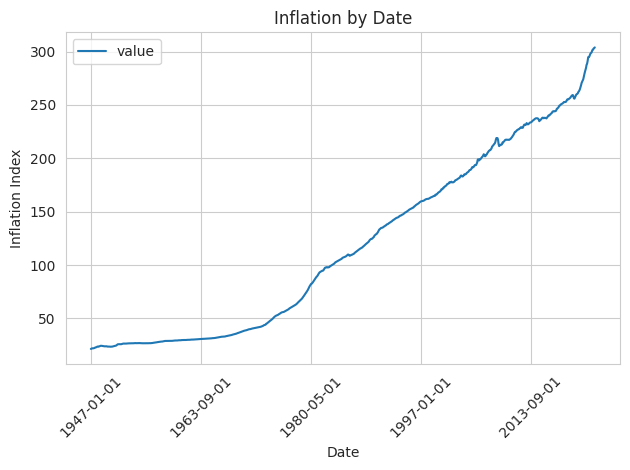

In [ ]:
Inflation.plot.line(x=cN6[0], y=cN6[1])
plt.title('Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.xticks(rotation=45)
plt.tight_layout()

Our primary dataset that we will be using for inflation, obtained from the U.S. government.

### Sticky Price: Inflation by Date
This is another inflation dataset, although this one is not maintained or recorded by the government. Its data is also much different from the other inflation dataset. Since the other inflation dataset matches the price increase of other commodities better, we will be using it for future calculations. Like the Inflation dataset, this is percentages, not an index.

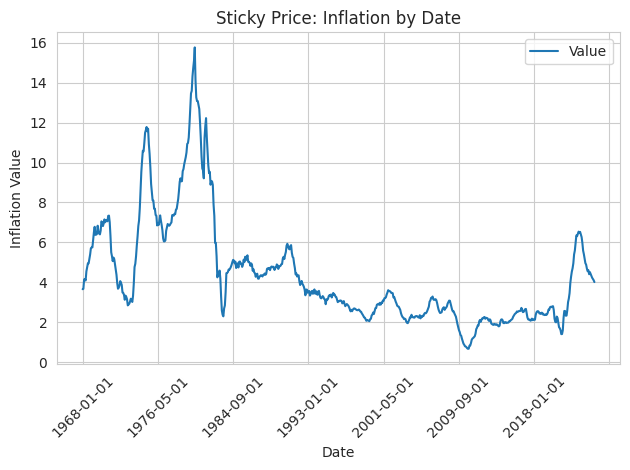

In [ ]:
# Ignore as this dataset will most likely not be used
StickyPrice.plot.line(x=cN7[0], y=cN7[1])
plt.title('Sticky Price: Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Value')
plt.xticks(rotation=45)
plt.tight_layout()

Our other dataset on inflation, it doesn't seem as reliable as our other one, so I will not be using it much.

### Commerial Real Estate Prices by Date
This dataset, also an index, began measurements in 2005. There appears to be a slight dip in real estate value around 2008.

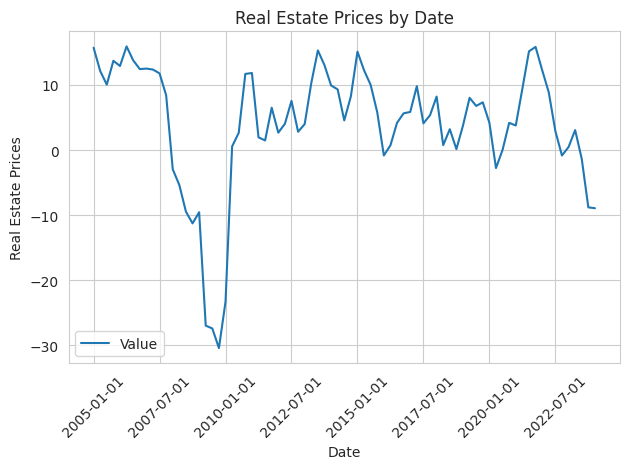

In [ ]:
ComRealPri.plot.line(x=cN8[0], y=cN8[1])
plt.title('Real Estate Prices by Date')
plt.xlabel('Date')
plt.ylabel('Real Estate Prices')
plt.xticks(rotation=45)
plt.tight_layout()

We don't use this dataset much, but I do like how well it shows the slight dip in the real estate market in 2008.

### Glass Histplot
In order to conserve space and time, we will only be doing one example of the reamining plots. This is a histogram of PPI_Glass prices in our recorded range. Measurements started in December 2003 and have been taken monthly with data up to August 2024

<Axes: xlabel='Price', ylabel='Count'>

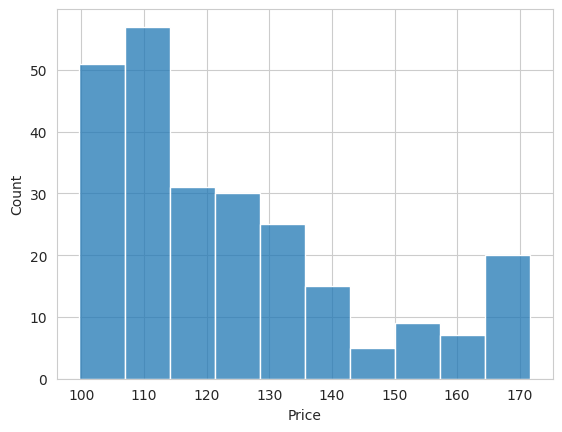

In [ ]:
# Since we are using a lot of different datasets for now I will used the SNS methods just for Glass Prices
sns.histplot(PPI_Glass,x=cN[1])

This SNS histogram of our PPI_Glass dataset shows the value distribution of our glass dataset. Values have historically been lower.

### Glass Kdeplot
Analagous to the above histogram, this is the kernal density plot for PPI_Glass.

<Axes: xlabel='Price', ylabel='Density'>

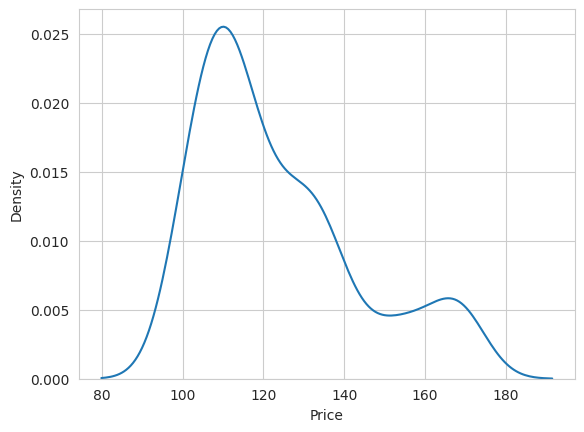

In [ ]:
sns.kdeplot(PPI_Glass,x=cN[1])

This is shows the distribution of values similar to a histogram

### Countplot
For the metals dataset, we are now demonstrating a countplot. To improve readability, I have binned the data into groups of 15.

Text(0.5, -10.914633430759954, 'Metals Binned')

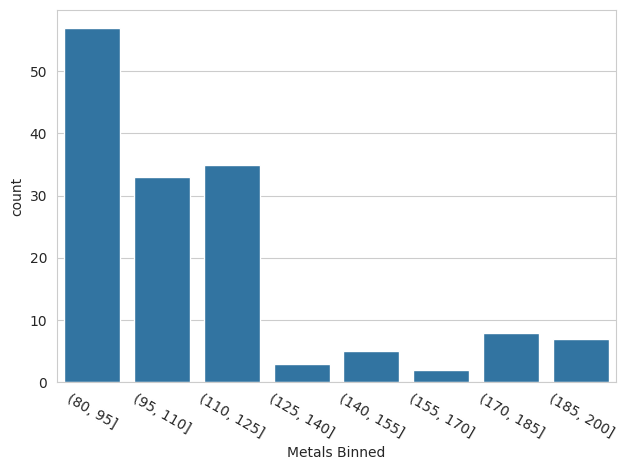

In [ ]:
bin_edge = [80, 95, 110, 125, 140, 155, 170, 185, 200]
PPI_Metals_Binned = PPI_Metals
PPI_Metals_Binned["Binned"] = pd.cut(PPI_Metals[PPI_Metals.columns[1]], bins = bin_edge)
sns.countplot(PPI_Metals_Binned,x = PPI_Metals_Binned['Binned'])
plt.xticks(rotation = -30)
plt.tight_layout()
plt.xlabel("Metals Binned")

The count plot here with bins of size 15 shows how many of times a value within each bin, appears. It's also somewhat similar to a histogram.

### Boxplot
An SNS boxplot on our PPI_Glass dataset.

<Axes: xlabel='Price'>

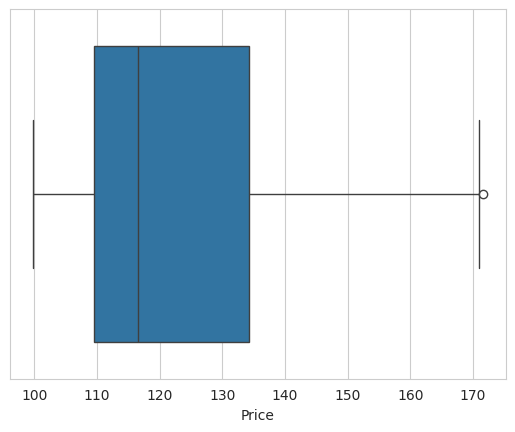

In [ ]:
sns.boxplot(PPI_Glass,x=cN[1])

The boxplot makes the quartiles of our dataset easy to notice. It also shows the full range of the data.

### Violin Plot
The last plot for this section is a Violin plot, also applied to our PPI_Glass dataset.

<Axes: xlabel='Price'>

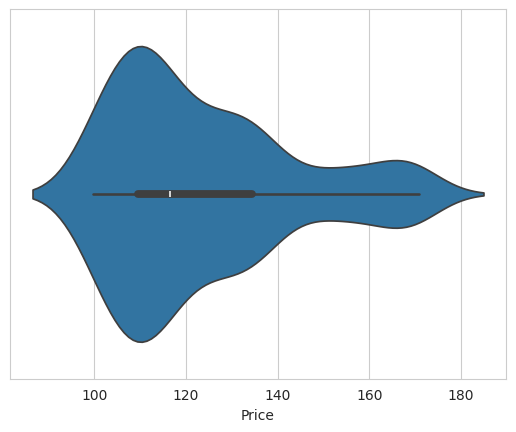

In [ ]:
sns.violinplot(PPI_Glass,x=cN[1])

This Violin plot is effectively a combination between a boxplot and a kernal density plot.

# (3) Two-Feature Plots - LJ
For this section, we are asked to show an example of sns.scatterplot, sns.swarmplot, and sns.stripplot with alterations to the Hue, Style, and Size.

## Scatter Plot
For the scatterplot, I will be showing values for some of the states in the Zillow Dataset. For now, I will be showing California, Texas, Florida, and New York. I chose these states because they were ones I expected to be more expensive compared to Texas. It displays the price of of the aformentioned states from 2000 until 2024.

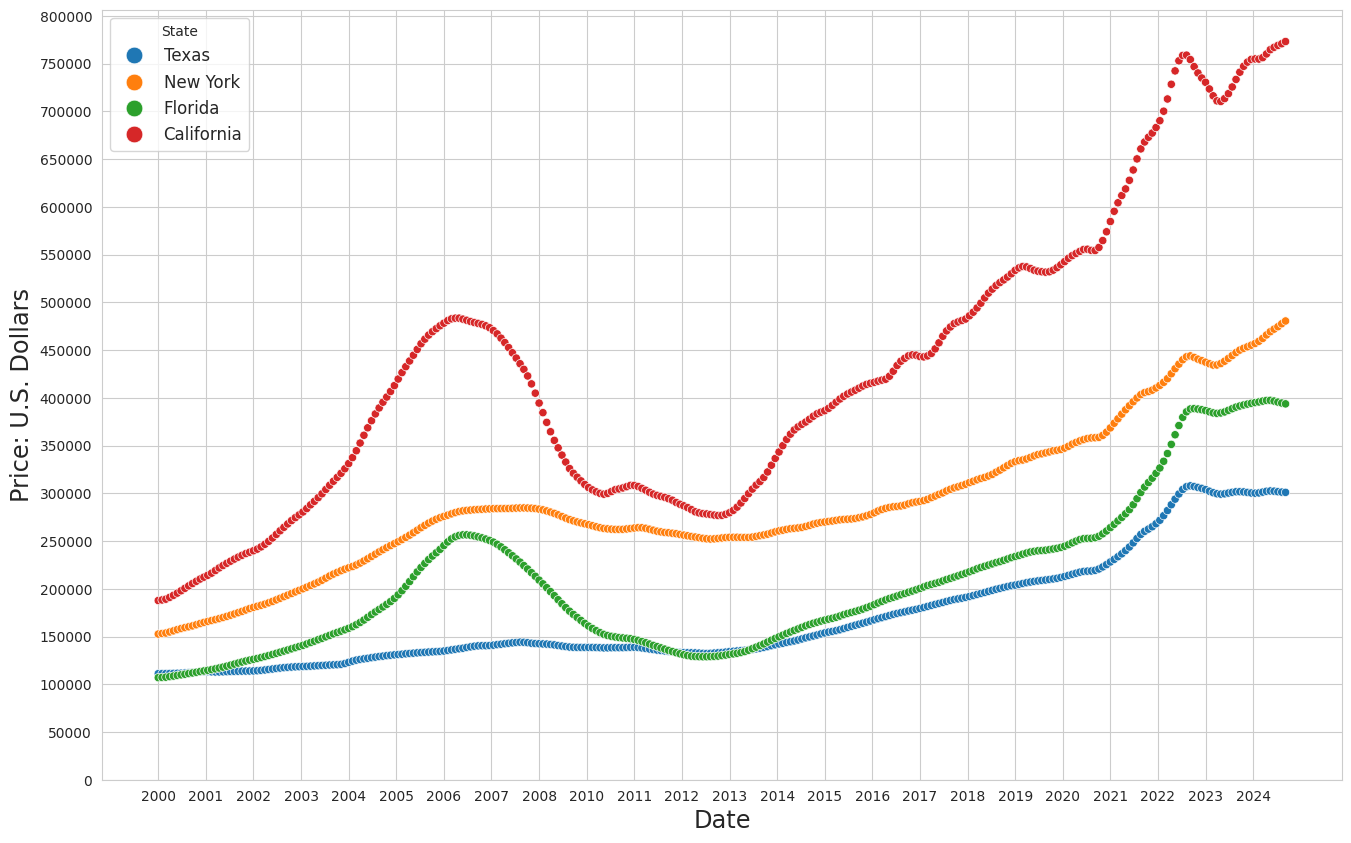

In [ ]:
Zillow_long = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in [6, 4, 3, 2]],  # Texas, New York, Florida, California
                     var_name='State_Name', value_name='State')
Zillow_long = Zillow_long.rename(columns={Zillow.columns[0]: 'Date'})

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.xlabel("Date",  fontsize = "xx-large")
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
sns.scatterplot(data=Zillow_long,x=Zillow_long.Date,y=Zillow_long.State, hue='State_Name')
plt.yticks(range(0, int(Zillow_long['State'].max()) + 50000, 50000))
plt.minorticks_off
plt.xscale("linear")
plt.xticks(minor = True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)

This scatter plot shows that the prices of houses in four of the biggest markets in the United States have risen, strangely both Florida and California had major spikes in housing cost from the years of 2004 to 2008. Neither Texas of New York had such a spike in that time period. Florida also noticed a far larger increasein price since 2014.

## Strip Plot
For the strip plot, I've decided to compare the home prices in Texas over time to some of our closest neighboring states. We will be looking at Texas, Arizona, Louisiana, Colorado, and South Dakota. It displays the price of of the aformentioned states from 2000 until 2024.

<ipython-input-66-585318a777ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZillowTrunc["Date"] = pd.to_datetime(ZillowTrunc["Date"], format='%Y-%m-%d')


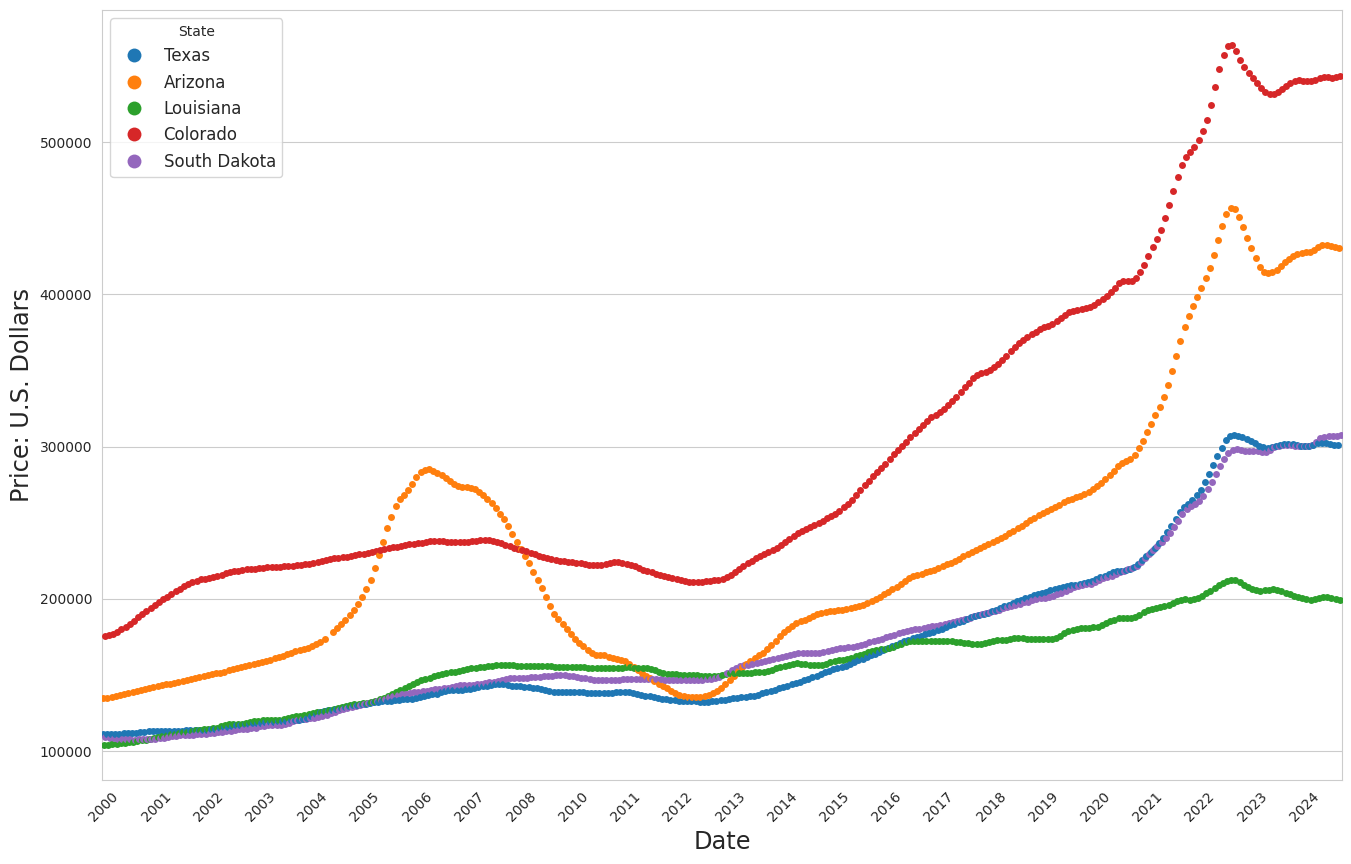

In [ ]:
ZillowTrunc = Zillow[["Texas", "Arizona", "Louisiana", "Colorado", "South Dakota", "Date"]]

# Convert to datetime
ZillowTrunc["Date"] = pd.to_datetime(ZillowTrunc["Date"], format='%Y-%m-%d')

# Melt the DataFrame to long format
ZillowLong = ZillowTrunc.melt(id_vars='Date', var_name='State', value_name='Price')

# Create the stripplot (without setting Date as index)
plt.figure(figsize=(16,10))
sns.stripplot(x="Date", y="Price", hue="State", data=ZillowLong, jitter=True, dodge=True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)
plt.xticks(rotation=45)
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
plt.xlabel("Date",  fontsize = "xx-large")
plt.show()

This strip plot shows us how prices have trended in Texas compared to its closest closest neighbors. The plot shows us that Colorado started out as and ended as the most expensive real estate market of these 5 states. Arizona however, has a massive spike not shared by the other 4 states. Louisiana convversly, didn't have nearly as big of a spike from the pandemic as the others. South Dakota is the closest to Texas for the longest amount of time, with the lines separating the most between 2008 and 2017, but practically overlapping otherwise.

## Swarm plot
Lastly our swarmplot. It is covering the states of California, Texas, Michigan. and Colorado. I chose these states because they have little overlap in points, allowing them to fit on the graph. This graph compares price against time for each of the states. The x axis scale is not perfectly scaled to the y data due to size constraints, but it's very close. It displays the price of of the aformentioned states from 2000 until 2024.

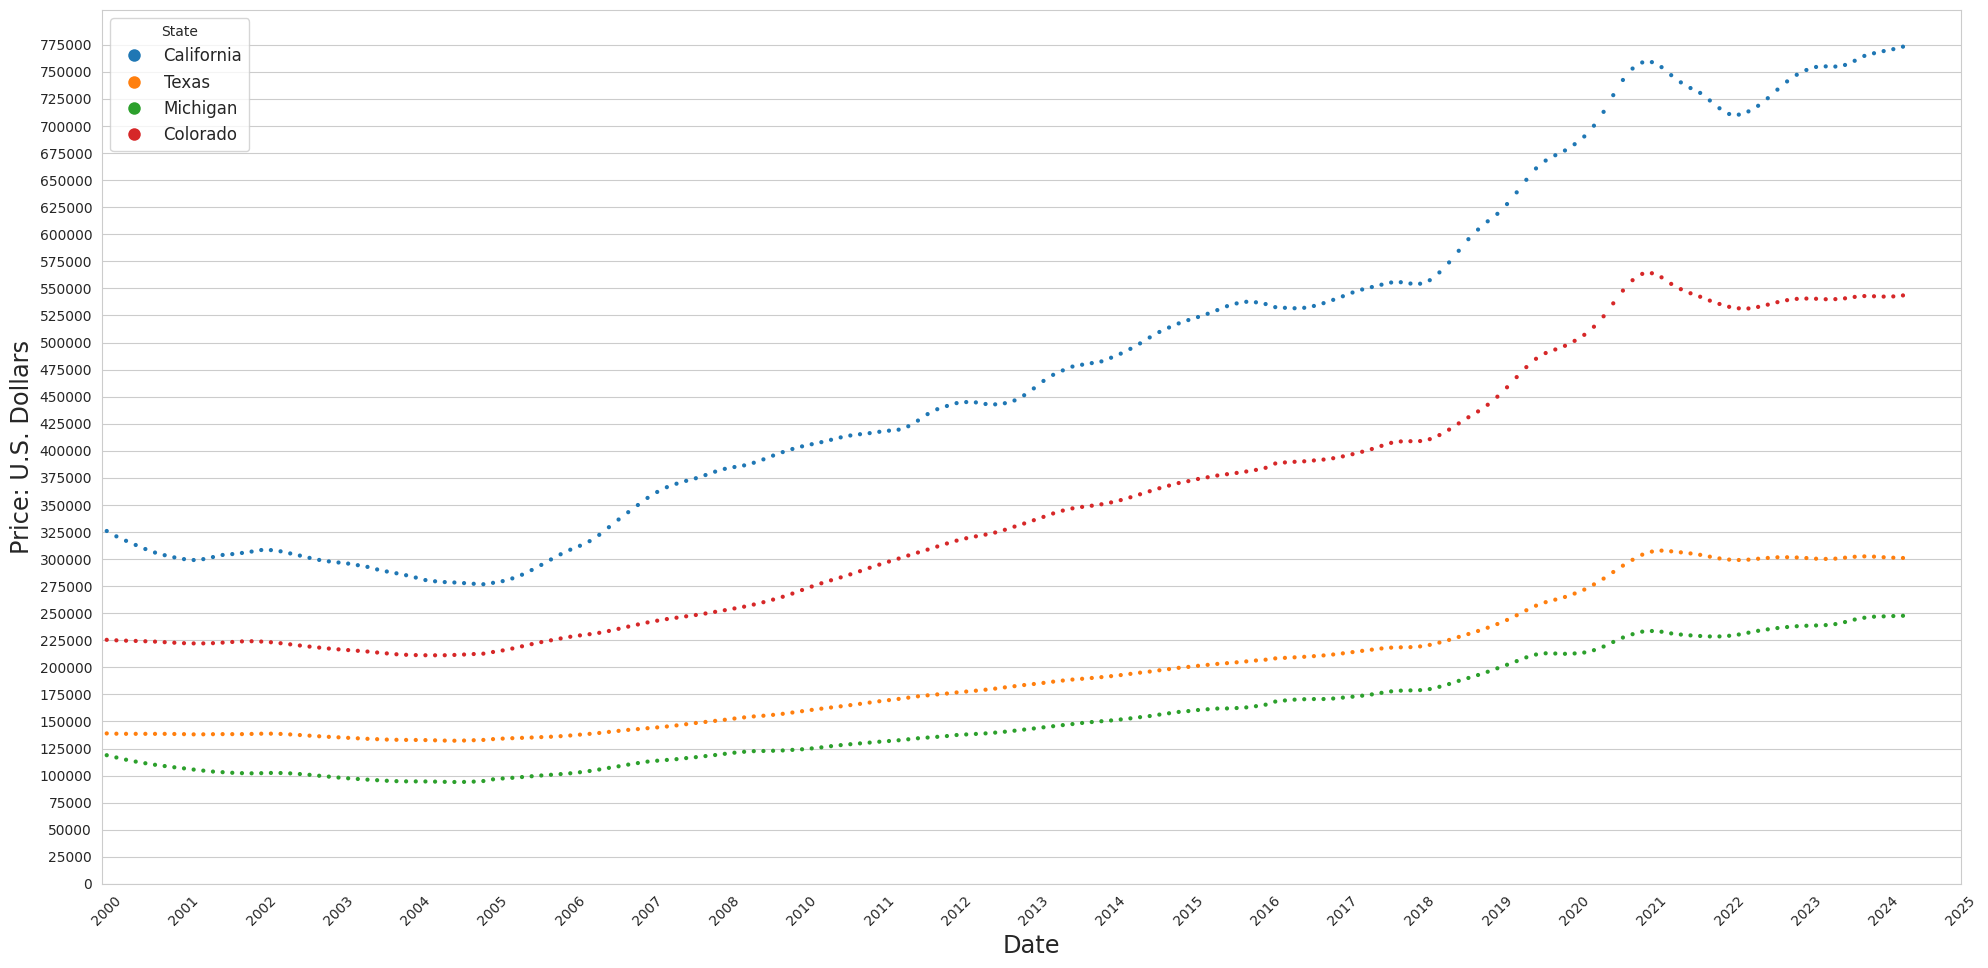

In [ ]:
ZillowEdit = Zillow
ZillowEdit = ZillowEdit.rename(columns={ZillowEdit.columns[0]: 'Date'})
ZillowEdit = ZillowEdit.dropna()
ZillowEditmelted = pd.melt(ZillowEdit, id_vars='Date', value_vars=['California', 'Texas', 'Michigan', 'Colorado'], var_name='State', value_name='Price')
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.swarmplot(x='Date', y='Price', hue='State', data=ZillowEditmelted, size=3)
plt.tight_layout()
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=3)
plt.xticks(ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
plt.yticks(range(0, int(Zillow_long['State'].max()) + 25000, 25000))
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
plt.xlabel("Date",  fontsize = "xx-large")
plt.show()
#print(ZillowEditmelted)

Although not visualized here directly, while working with this graph, I noticed how each state is in a "group" and have there prices overlap greatly. This made making this plot slightly difficult as overalp was causing points to not show. This graph does directly show that the prices of each state seem to increase and decrease at the same time.

# (4) Summarization of Data - LJ
Summarizes the data using df.shape, df.info(), and df.describe(include = "all")

#### Glass
Producer Price Index by Industry: Glass and Glass Product Manufacturing

https://fred.stlouisfed.org/series/PCU3272132721

In [ ]:
PPI_Glass.shape
PPI_Glass.info()
PPI_Glass.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,123.64
std,NaN,19.93
min,NaN,99.70
25%,NaN,109.52
50%,NaN,116.50
75%,NaN,134.30


#### Lumber
Producer Price Index by Commodity: Lumber and Wood Products

https://fred.stlouisfed.org/series/WPU08

In [ ]:
PPI_Lumber.shape
PPI_Lumber.info()
PPI_Lumber.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1185 non-null   object 
 1   Price   1185 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,DATE,Price
count,1185,1185.00
unique,1185,NaN
top,1926-01-01,NaN
freq,1,NaN
mean,NaN,100.04
std,NaN,87.33
min,NaN,5.30
25%,NaN,31.60
50%,NaN,64.90
75%,NaN,179.70


#### Asphalt
Producer Price Index by Industry: Asphalt Shingle and Coating Materials Manufacturing

https://fred.stlouisfed.org/series/WPU08

In [ ]:
PPI_Asphalt.shape
PPI_Asphalt.info()
PPI_Asphalt.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    586 non-null    object 
 1   Price   586 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


,DATE,Price
count,586,586.00
unique,586,NaN
top,1975-12-01,NaN
freq,1,NaN
mean,NaN,153.97
std,NaN,76.72
min,NaN,58.40
25%,NaN,99.10
50%,NaN,108.45
75%,NaN,228.90


#### Cement
Producer Price Index by Industry: Cement and Concrete Product Manufacturing

https://fred.stlouisfed.org/series/PCU32733273

In [ ]:
PPI_Cement.shape
PPI_Cement.info()
PPI_Cement.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,157.06
std,NaN,35.31
min,NaN,100.00
25%,NaN,135.00
50%,NaN,146.30
75%,NaN,174.98


#### Plumbing
Producer Price Index by Industry: Plumbing Fixture Fitting and Trim Manufacturing

https://fred.stlouisfed.org/series/PCU332913332913

In [ ]:
PPI_Plumbing.shape
PPI_Plumbing.info()
PPI_Plumbing.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    933 non-null    object 
 1   Price   933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB


,DATE,Price
count,933,933.00
unique,933,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,130.91
std,NaN,101.39
min,NaN,17.40
25%,NaN,32.90
50%,NaN,106.00
75%,NaN,198.70


#### Metals
Producer Price Index by Commodity: Metals and Metal Products: Steel Wire, Stainless Steel

https://fred.stlouisfed.org/series/WPU10170502

In [ ]:
PPI_Metals.shape
PPI_Metals.info()
PPI_Metals.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    152 non-null    object  
 1   Price   152 non-null    float64 
 2   Binned  150 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 3.1+ KB


,DATE,Price,Binned
count,152,152.00,150
unique,152,NaN,8
top,2010-12-01,NaN,"(80, 95]"
freq,1,NaN,57
mean,NaN,112.50,NaN
std,NaN,31.33,NaN
min,NaN,83.80,NaN
25%,NaN,91.57,NaN
50%,NaN,100.05,NaN
75%,NaN,118.65,NaN


#### Sticky Price
Sticky Price: Inflation dataset from FRED

https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL

In [ ]:
StickyPrice.shape
StickyPrice.info()
StickyPrice.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    681 non-null    object 
 1   Value   681 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


,DATE,Value
count,681,681.00
unique,681,NaN
top,1968-01-01,NaN
freq,1,NaN
mean,NaN,4.33
std,NaN,2.68
min,NaN,0.66
25%,NaN,2.46
50%,NaN,3.38
75%,NaN,5.18


#### ComRealPrice
Commercial Real Estate Prices for United States. FRED dataset, very small.

https://fred.stlouisfed.org/series/COMREPUSQ159N

In [ ]:
ComRealPri.shape
ComRealPri.info()
ComRealPri.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    77 non-null     object 
 1   Value   77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


,DATE,Value
count,77,77.00
unique,77,NaN
top,2005-01-01,NaN
freq,1,NaN
mean,NaN,3.99
std,NaN,9.79
min,NaN,-30.40
25%,NaN,0.73
50%,NaN,5.35
75%,NaN,10.29


#### Inflation
U.S. Inflation Dataset from Kaggle

https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present

In [ ]:
Inflation.shape
Inflation.info()
Inflation.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


,date,value
count,918,918.00
unique,918,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,117.79
std,NaN,83.74
min,NaN,21.48
25%,NaN,32.10
50%,NaN,106.90
75%,NaN,188.00


#### Zillow
Zillow's Zestimates from Kaggle.

https://www.kaggle.com/datasets/robikscube/zillow-home-value-index

In [ ]:
ZillowRound = Zillow
ZillowRound.shape
ZillowRound.info()
ZillowRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      297 non-null    object 
 1   Virginia                  297 non-null    float64
 2   California                297 non-null    float64
 3   Florida                   297 non-null    float64
 4   New York                  297 non-null    float64
 5   New Jersey                297 non-null    float64
 6   Texas                     297 non-null    float64
 7   Michigan                  297 non-null    float64
 8   Massachusetts             297 non-null    float64
 9   Arizona                   296 non-null    float64
 10  Washington                297 non-null    float64
 11  Colorado                  297 non-null    float64
 12  Illinois                  297 non-null    float64
 13  the District of Columbia  297 non-null    float64
 14  Nevada    

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,296.00,...,297.00,297.00,297.00,297.00,270.00,297.00,296.00,297.00,297.00,297.00
unique,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,242488.31,429145.13,207179.48,288656.41,322526.22,170325.95,147371.77,365521.56,233011.82,...,122494.35,147074.45,132035.81,250994.49,227735.07,122222.99,174020.48,151438.91,136942.68,137675.35
std,NaN,63730.11,156266.88,79452.69,77960.39,79099.36,58160.31,40109.98,99571.81,89852.06,...,31943.86,38018.71,35251.78,58175.47,53584.35,32100.63,56257.25,41923.50,33495.73,32365.92
min,NaN,123345.47,187686.83,106914.49,152590.52,168867.68,111067.07,94106.30,194441.92,134673.83,...,84888.60,96355.62,87834.71,147889.12,143894.46,81317.07,107542.72,107906.33,91262.66,105495.85
25%,NaN,214351.97,301556.59,144823.91,253787.07,278516.15,132901.50,121184.68,303774.76,160742.17,...,104538.12,123671.96,112836.89,216604.69,200597.70,103589.95,138535.78,125520.84,117911.36,116621.97
50%,NaN,237064.01,412385.37,188508.75,273168.67,310641.73,141492.32,139304.56,341643.68,207504.59,...,109412.20,134960.05,118984.89,246237.74,214299.00,110293.63,150640.97,131850.81,122889.18,126542.66
75%,NaN,265324.56,523548.17,243882.46,326718.84,357889.49,201412.42,160608.48,412832.63,272287.70,...,132860.29,157237.97,143458.38,273233.50,245455.18,130922.18,199129.85,168436.58,152967.51,143455.34


## Summary
These built in functions show us a lot of details about each of the datasets. Although, a large majority of this we did already know from earilier manuipulation.

# (5) Visualization of Data - LJ
Here we will be showing the requested histogram, boxplot, and scatter matrix

## Histogram
To spare our computing power, I will not be applying a histogram to our Zillow Dataset. Instead I will apply this to all of the PPI datasets.

### PPI_Glass
First we will generate a histogram for our PPI_Glass dataset.

Text(0.5, 1.0, 'Glass')

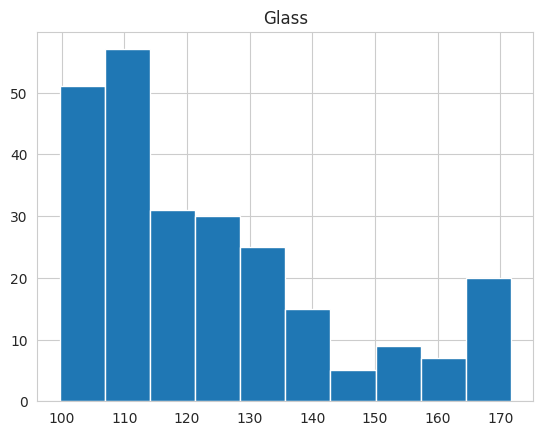

In [ ]:
PPI_Glass.hist()
plt.title("Histogram of Glass prices")

From this we can see that glass has traditionally be cheaper. There are far more instances of glass being at lower prices than it being at higher prices. This lines up with the idea of inflation spiking causing a price increase.

### PPI_Lumber
Now we will create a histogram based on our PPI_Lumber dataset.

Text(0.5, 1.0, 'Lumber')

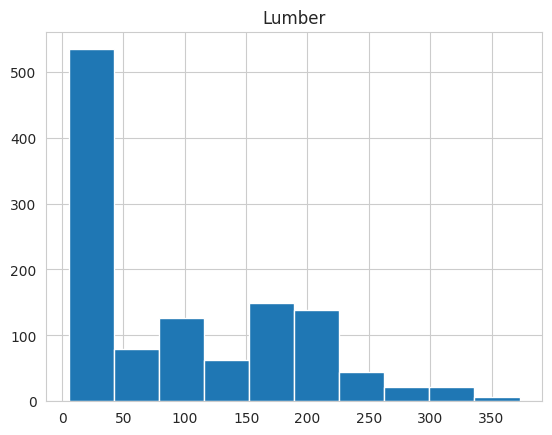

In [ ]:
PPI_Lumber.hist()
plt.title("Histogram of Lumber prices")

Lumber shows what we saw in glass, but far more effectively. This is because our lumber dataset began taking monthly datapoints back in 1927, meaning there are far more values from before inflation spiked.

### PPI_Asphalt
Now we will create a histogram based on our PPI_Asphalt dataset.

Text(0.5, 1.0, 'Asphalt')

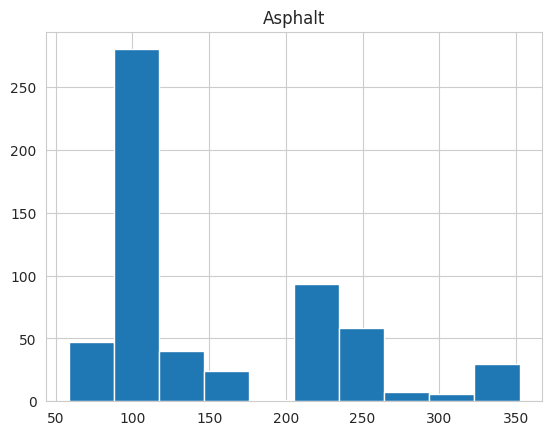

In [ ]:
PPI_Asphalt.hist()
plt.title("Histogram of Asphalt prices")

Our Asphalt dataset shows something strange, a complete gap between values. From around 175-205, there is not a single recorded value, this indicates there was quite a jump in value.

### PPI_Cement
Now we will create a histogram based on our PPI_Cement dataset.

Text(0.5, 1.0, 'Cement')

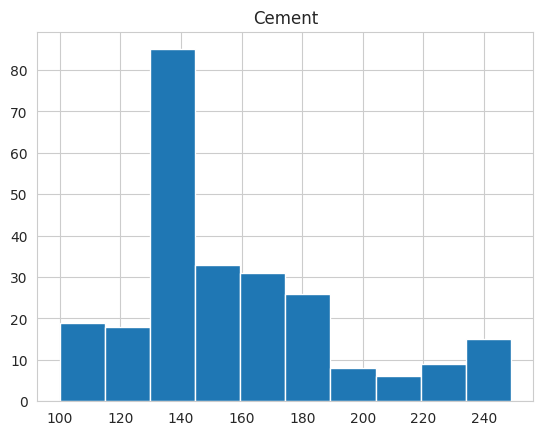

In [ ]:
PPI_Cement.hist()
plt.title("Histogram of Cement Prices")

Cement is the first dataset to show a more middle centered distribution. It is still left justified, which is expected as inflation has increased more recently, and rarely decreases back to original values.

### PPI_Plumbing
Now we will create a histogram based on our PPI_Plumbing dataset.

Text(0.5, 1.0, 'Plumbing')

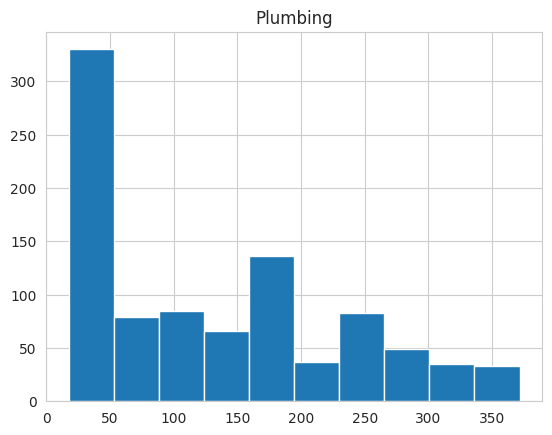

In [ ]:
PPI_Plumbing.hist()
plt.title("Histogram of Plumbing Prices")

The plumbing dataset also began taking measurements earlier in the 1900's than the other PPI datasets. PPI_Plumbing began measurements in 1947. This explains why its distribution is similar to the lumber datasets.

### PPI_Metals
Now we will create a histogram based on our PPI_Metals dataset.

Text(0.5, 1.0, 'Histogram of Metal Prices')

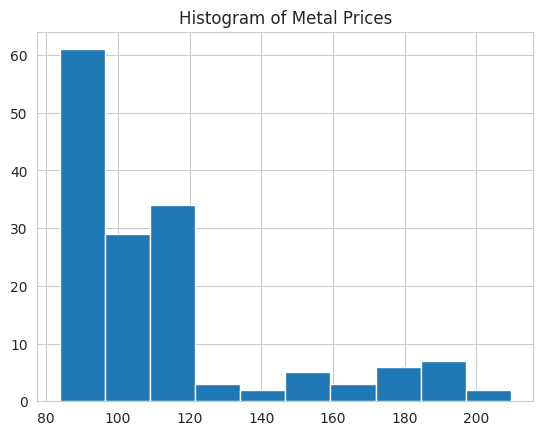

In [96]:
PPI_Metals.hist()
plt.title("Histogram of Metal Prices")

The metals dataset is extremely left justified, it shows a distribution that clearly indidcates prices have more often than not, been low.

### Summary/Observations
All of the plots are more justified to the left side, meaning things over the course of history have been cheaper than they are now. This aligns with how inflation normally works. Even stronger justification for this conclusion is that the two sets that started recording earliest, lumber and plumbing, had the most values on the lower end


## Boxplot
For the boxplot, I think the best looking of the options is the Inflation Dataset.

Text(0.5, 1.0, 'Inflation Boxplot')

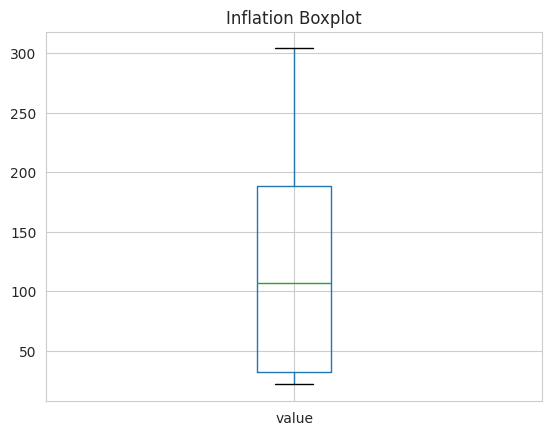

In [ ]:
Inflation.boxplot()
plt.title("Inflation Boxplot")

The Boxplot shows us that the values are focused on the lower side, with a few big outliers.

## Scatter Matrix
For the scatter matrix, I have combined the PPI_Glass and PPI_Lumber into a single dataset, so that they can be compared against eachother. This are a combination of a scatter plot and a histogram. So the y axis are all counts/occurences of the x value which is the inexed price.

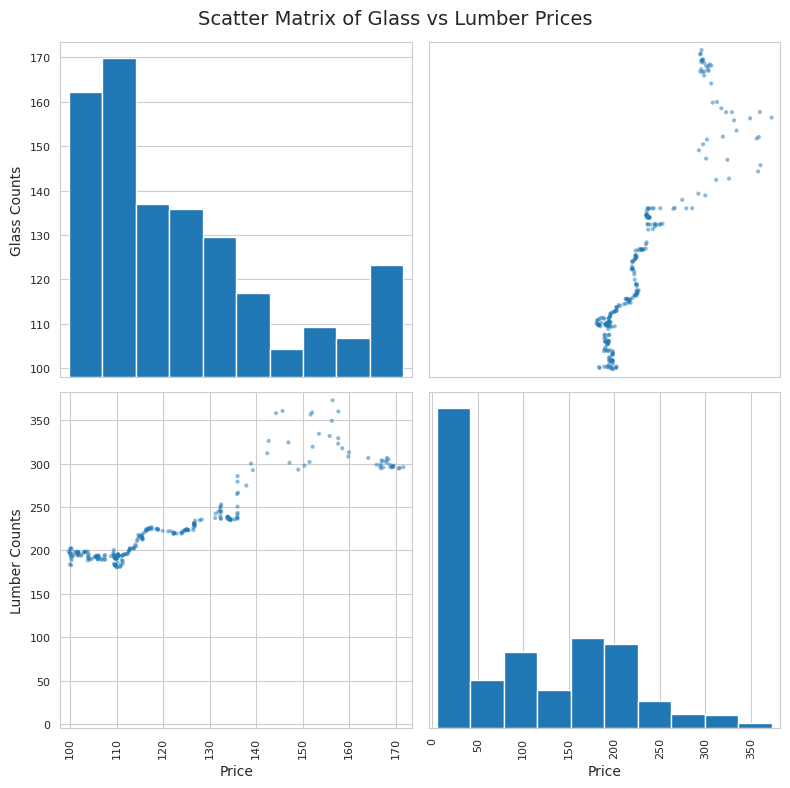

In [ ]:
GVL = pd.merge(PPI_Glass, PPI_Lumber, on='DATE', how='outer')
axes = pd.plotting.scatter_matrix(GVL, figsize = (8,8))
plt.suptitle("Scatter Matrix of Glass vs Lumber Prices", fontsize=14)
axes[1, 0].set_xlabel("Price")
axes[1, 0].set_ylabel("Lumber Counts")
axes[1, 1].set_xlabel("Price")
axes[0, 0].set_ylabel("Glass Counts")
plt.tight_layout()
plt.show()

### Scatter Matrix Conclusion
The Scatter Matrix can be helpful, but for us, we mostly only care about the histograms and we viewed those earlier. Labeling this type of plot is difficult, but I think we managed to get across the necessary information.

# (6) Detecting Outliers - LJ
To detect outlies, I will primarly be using scatter plots, as they make outliers easy to spot. We will focus on datasets not obtained from Kaggle, as they almost definitly have had there outliers removed. I should note that I had to mess with the x tick values and locations, this manual placement of tick values means they could be slightly off, however, this should not affect our attempt to visualize outliers, and the inaccuracy should be minimal.

## PPI-Glass
The first dataset I will be placing into a scatter plot is PPI_Glass.

Text(0.5, 1.0, 'Glass Price by Date')

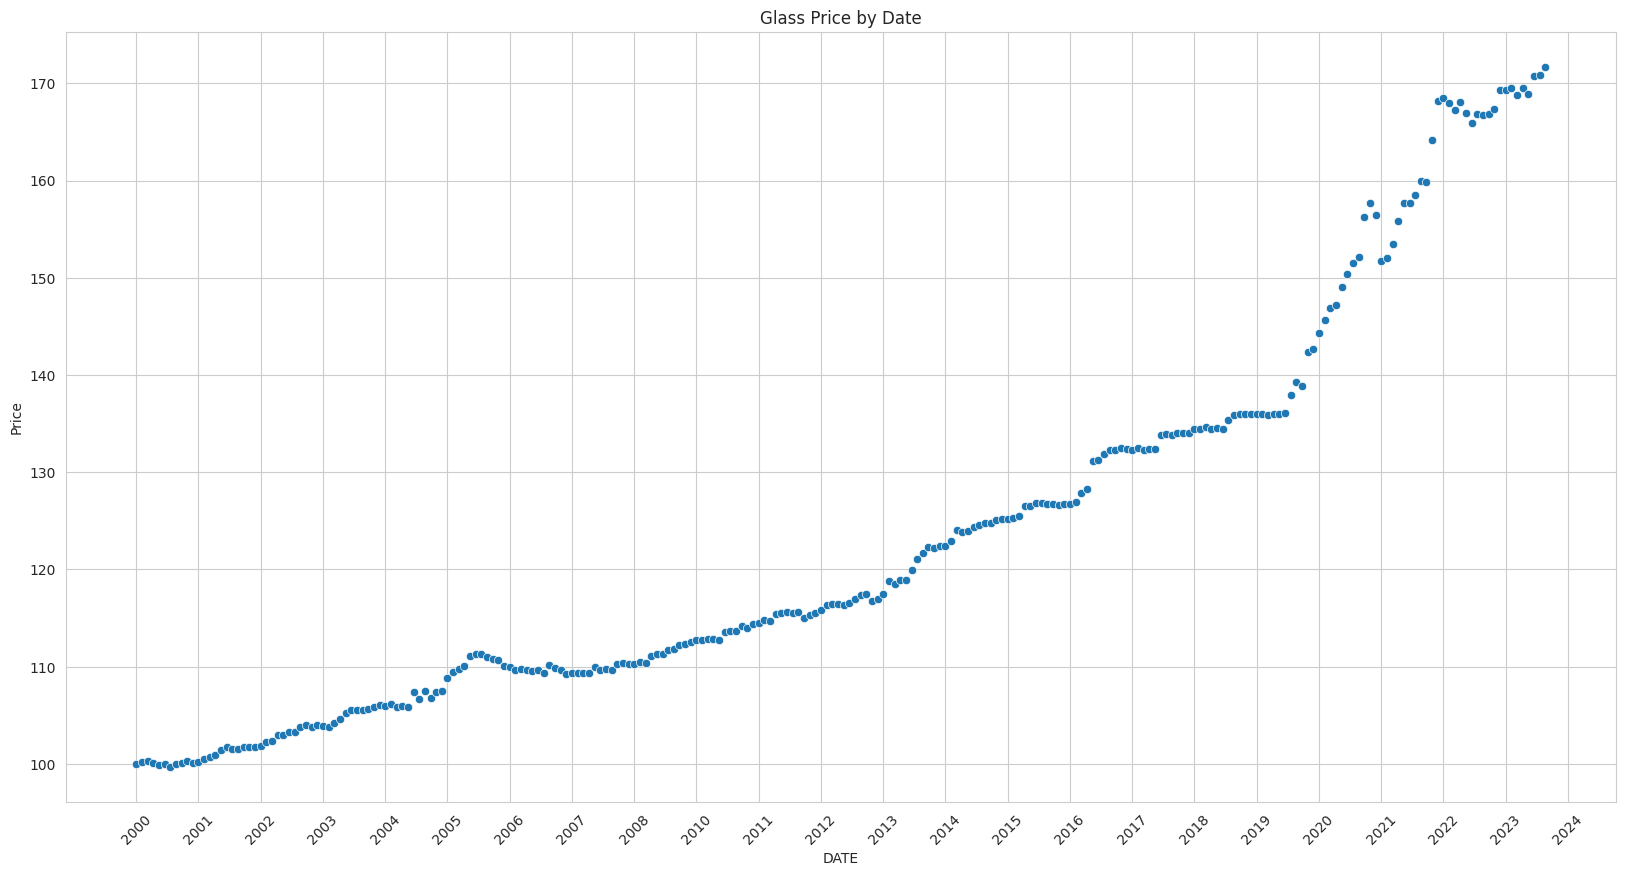

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Glass, x = PPI_Glass.columns[0], y = PPI_Glass.columns[1])
plt.title('Glass Price by Date')

 From this scatter plot we can tell that PPI_Glass does not have any major outliers. We can also notice prices begin spiking at a much faster rate around 2019, growing faster until around 2023, when the increase seems to be returning to normal.

## PPI-Lumber
Next up for a scatter plot is PPI_Lumber

Text(0.5, 1.0, 'Lumber Price by Date')

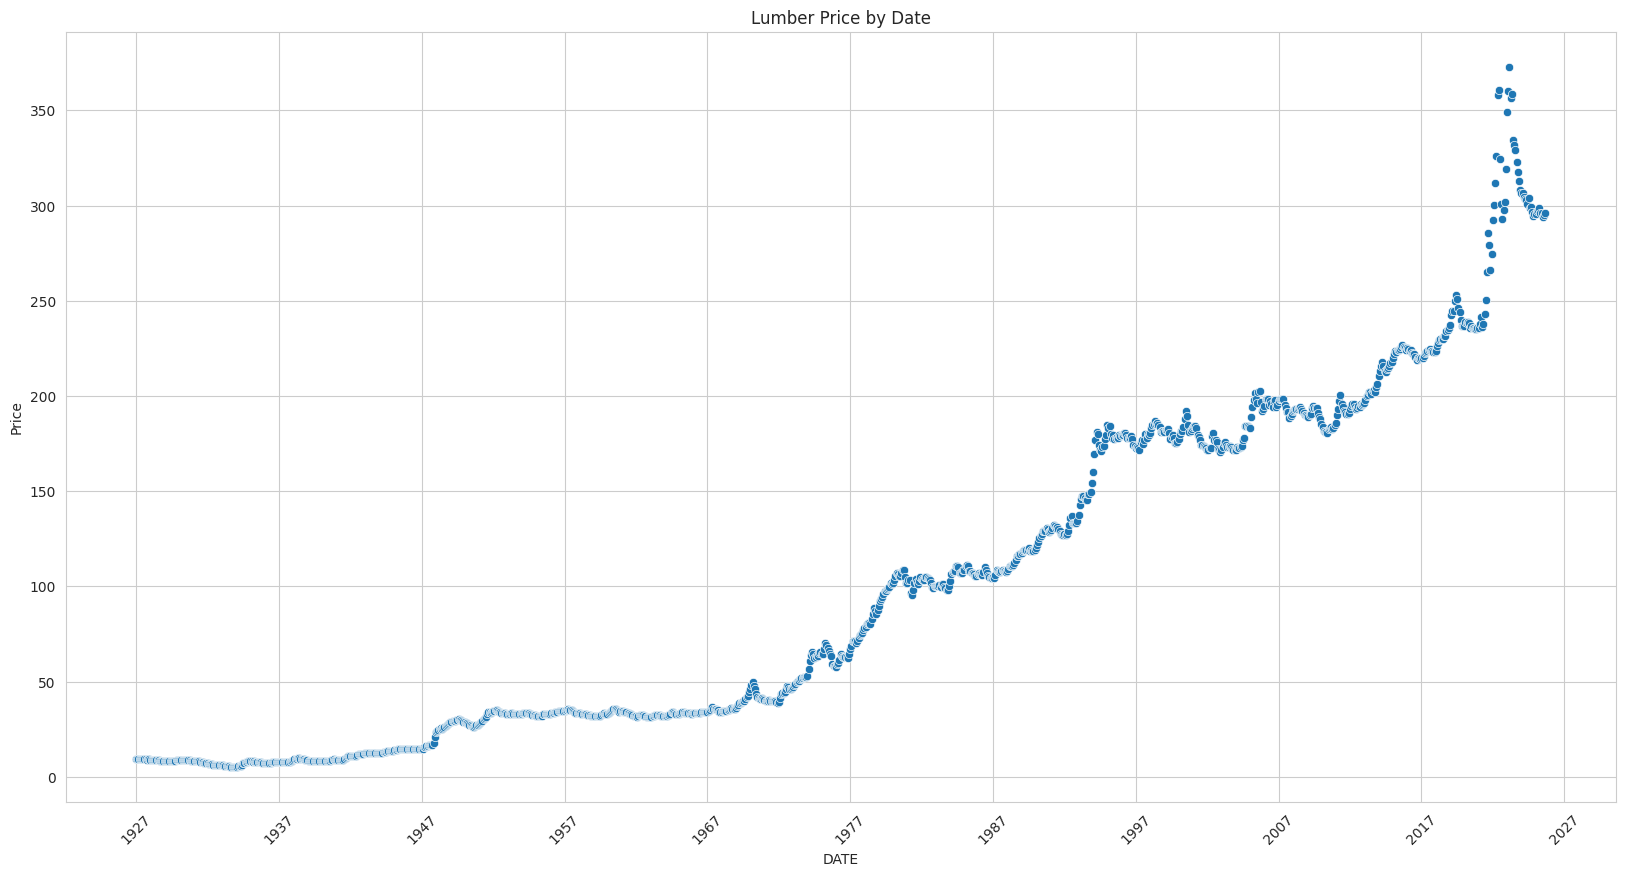

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200],
           labels = ["1927", "1937", "1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Lumber, x = PPI_Lumber.columns[0], y = PPI_Lumber.columns[1])
plt.title('Lumber Price by Date')

As far as outliers, there do not seem to be any outliers beyond reason. There is a single datapoint between 2017 and 2027 that is a bit higher than the others, but it is still within reason. This scatter plot also shows that Lumber prices use to be fairly stable, increasing at a slow rate until the late 1970's, where price growth begain to speed up. We also see after 1997 that the price begins to jump around, going up and down in cycles while maintaining an upward trajectory. It also shows a fairly large dip in the 2023-2024 range, it seems to be recovering faster than other sectors of the market.

## PPI-Plumbing
Next on the scatter plot, PPI_Plumbing.

Text(0.5, 1.0, 'Plumbing Price by Date')

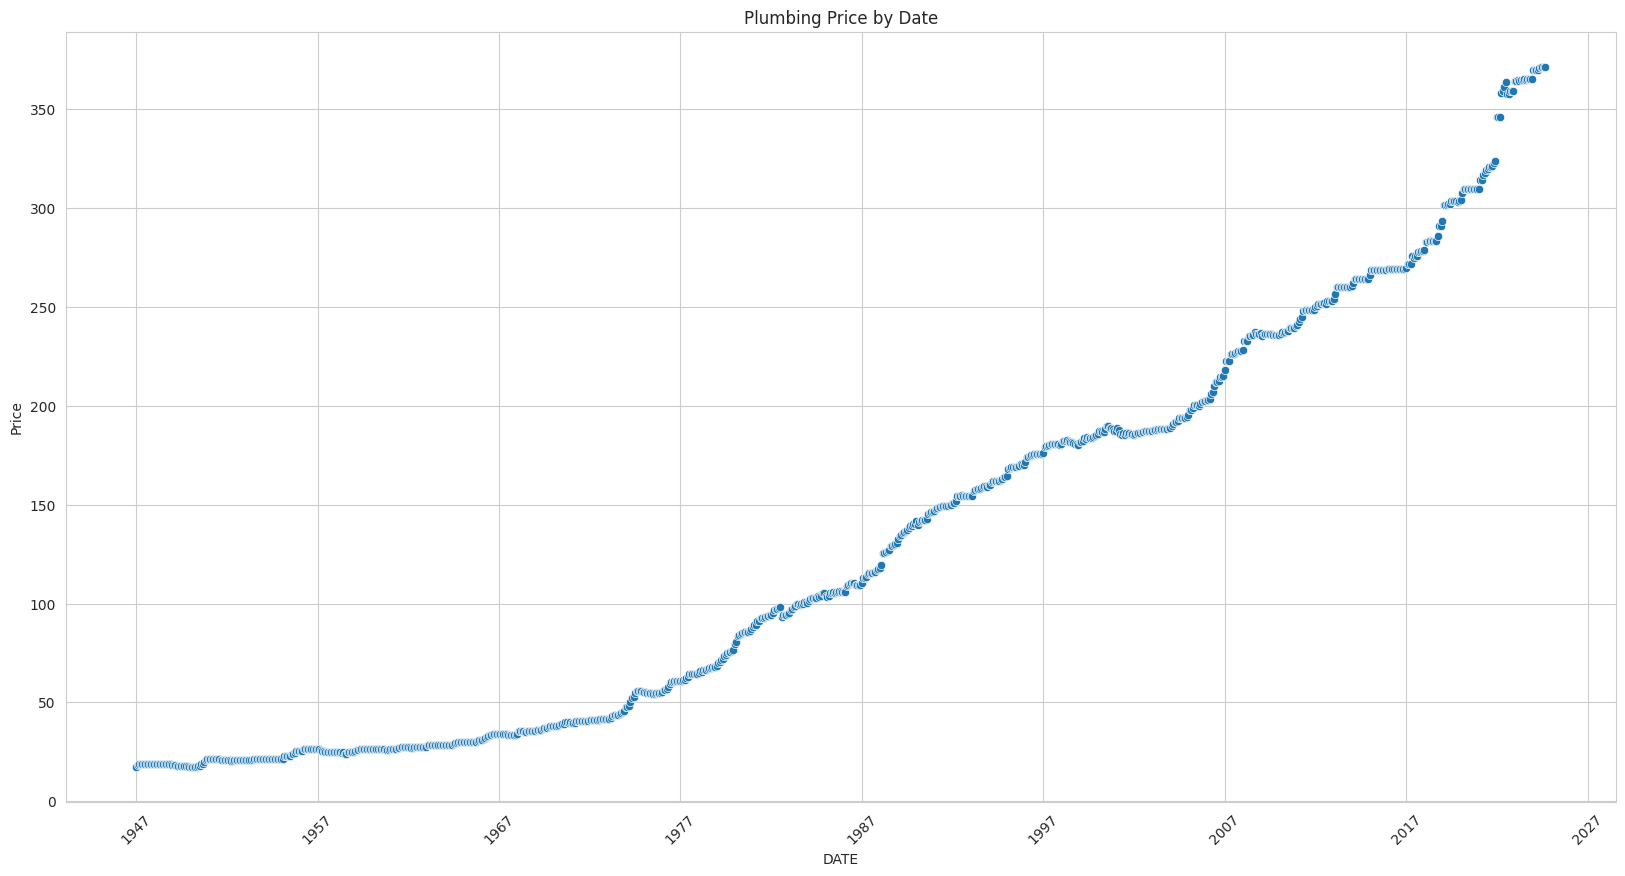

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Plumbing, x = PPI_Plumbing.columns[0], y = PPI_Plumbing.columns[1])
plt.title('Plumbing Price by Date')

Once again, not any major outliers here. Although our Lumber and Plumbing datasets were very similar in there histograms, Plumbing shows a much more consistent price increase. It does not have any of the major dips that PPI_Lumber had. It does however have a massive price spike between 2020-2022, leaving a decent gap of whitespace between values.

## PPI-Asphalt
Next up, PPI_Asphalt.

Text(0.5, 1.0, 'Asphalt Price by Date')

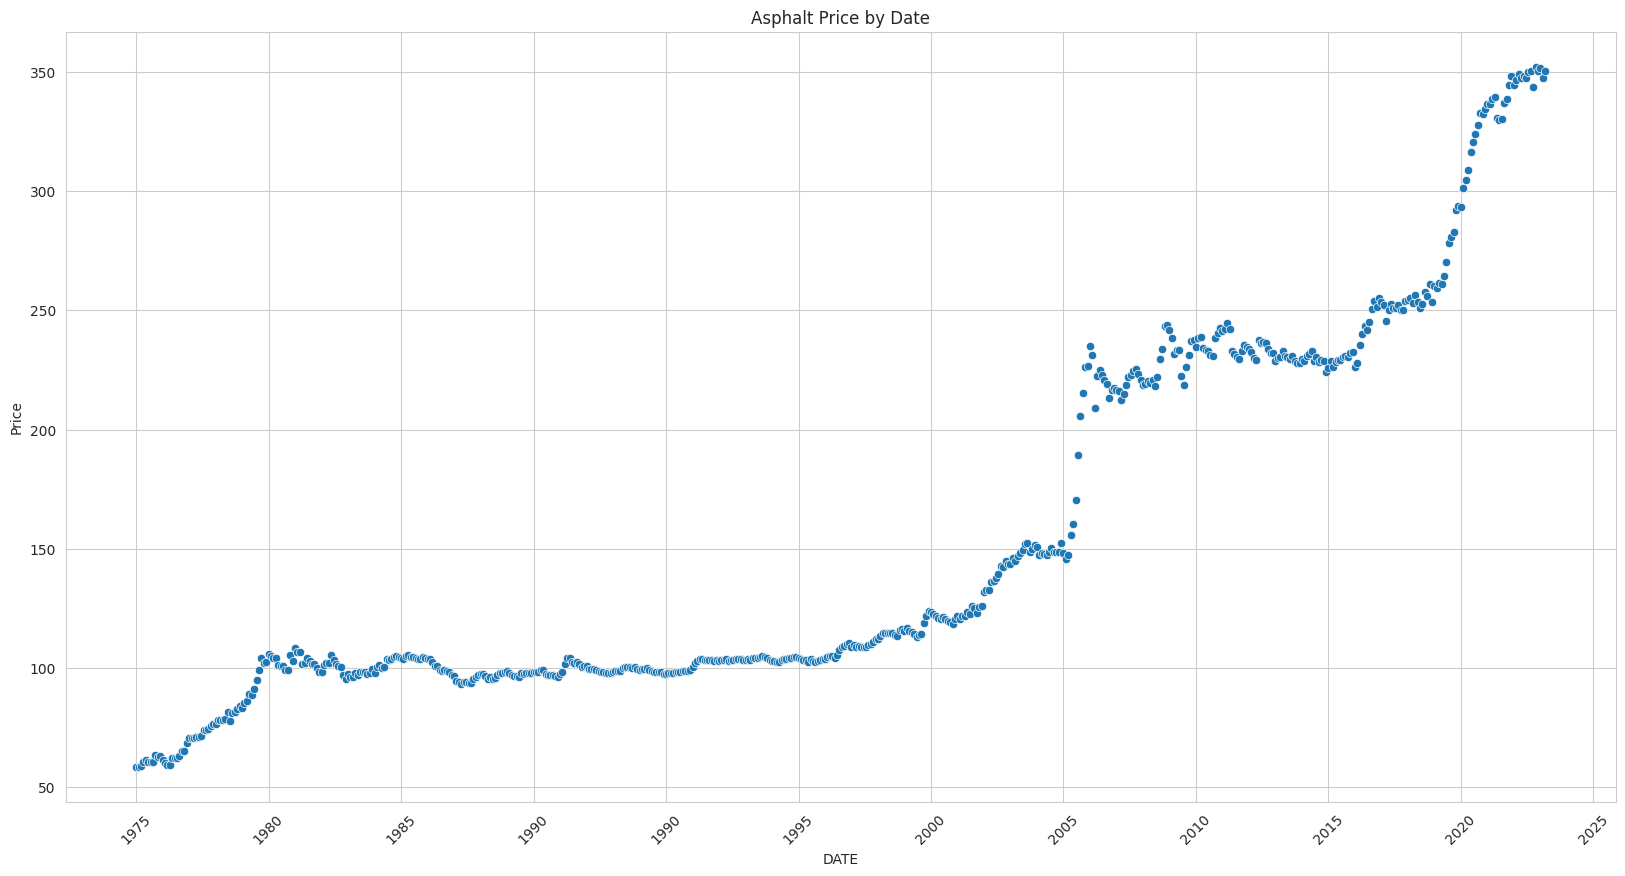

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 55, 110, 165, 220, 275, 330, 385, 440, 495, 550, 605],
           labels = ["1975", "1980", "1985", "1990", "1990", "1995", "2000", "2005", "2010", "2015", "2020", "2025"])
sns.scatterplot(PPI_Asphalt, x = PPI_Asphalt.columns[0], y = PPI_Asphalt.columns[1])
plt.title('Asphalt Price by Date')

No outliers here. However, the Asphalt dataset does show one of the biggest spikes. Over the course of around 7 months in 2005, the price spiked from around 145-150 to 235-240. This price is a massive increase over such a short period, especially when compared to price increases before the 2005 spike.

## PPI-Cement
Next up, PPI_Cement.

Text(0.5, 1.0, 'Cement Price by Date')

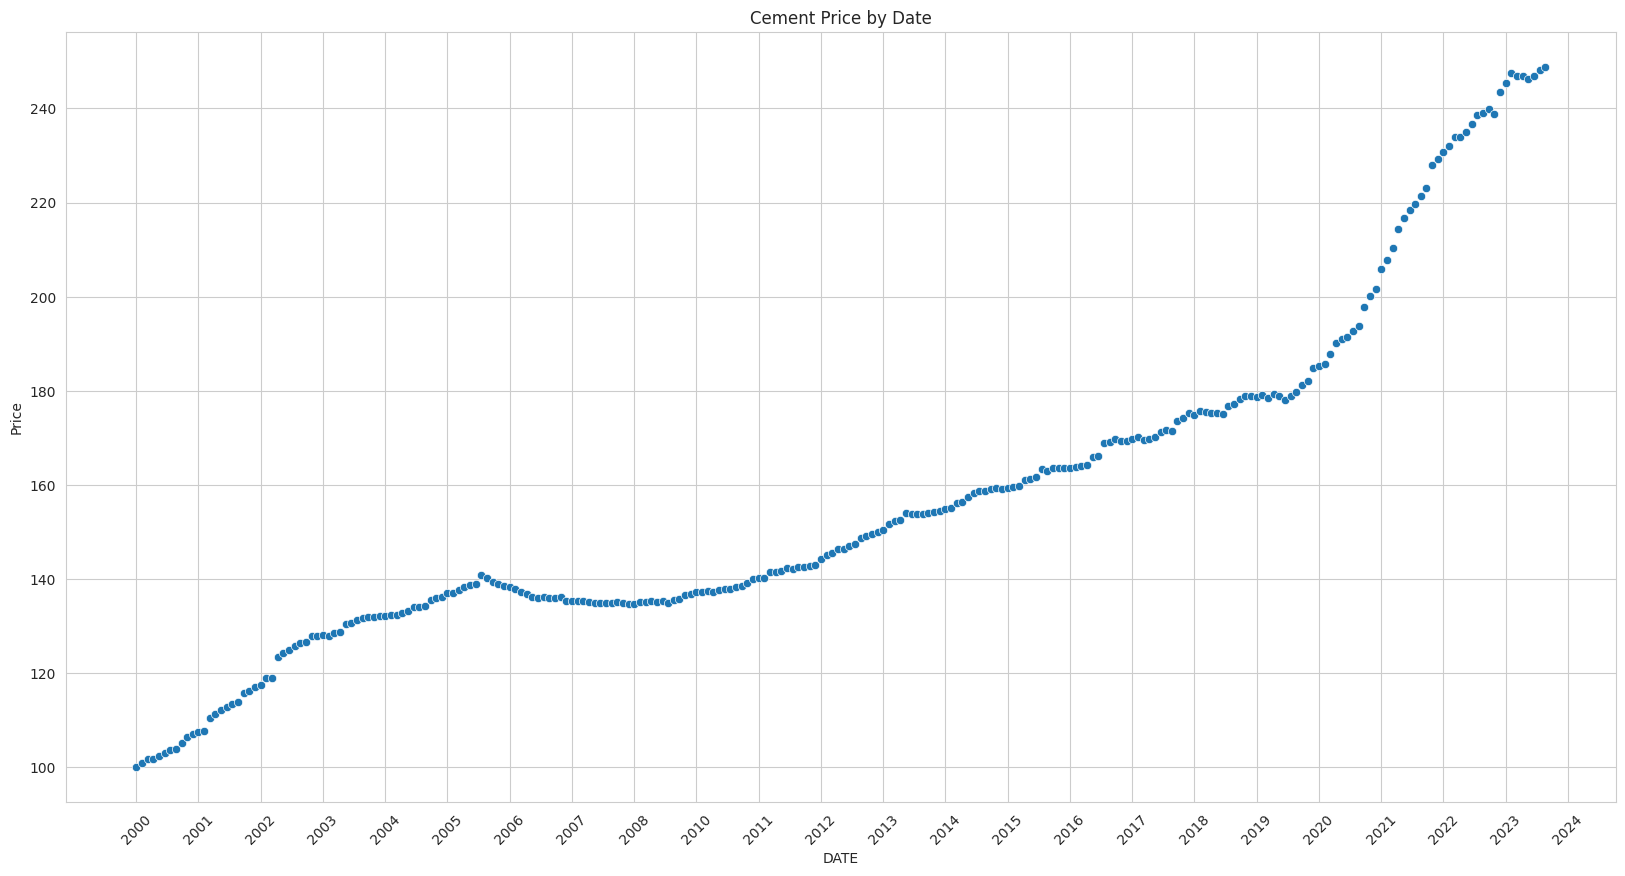

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Cement, x = PPI_Cement.columns[0], y = PPI_Cement.columns[1])
plt.title('Cement Price by Date')

Once again, not any outliers to be spotted here. The cement dataset began taking measurements at the same time as the glass dataset. However, the cement dataset saw a much higher increase in point values, rising to around 250, but glass only saw a max of around 175. This means cement saw a much larger percentage price increase since 2000.

## PPI-Metals
Last of the PPI_Datasets is PPI_Metals.

Text(0.5, 1.0, 'Metals Price by Date')

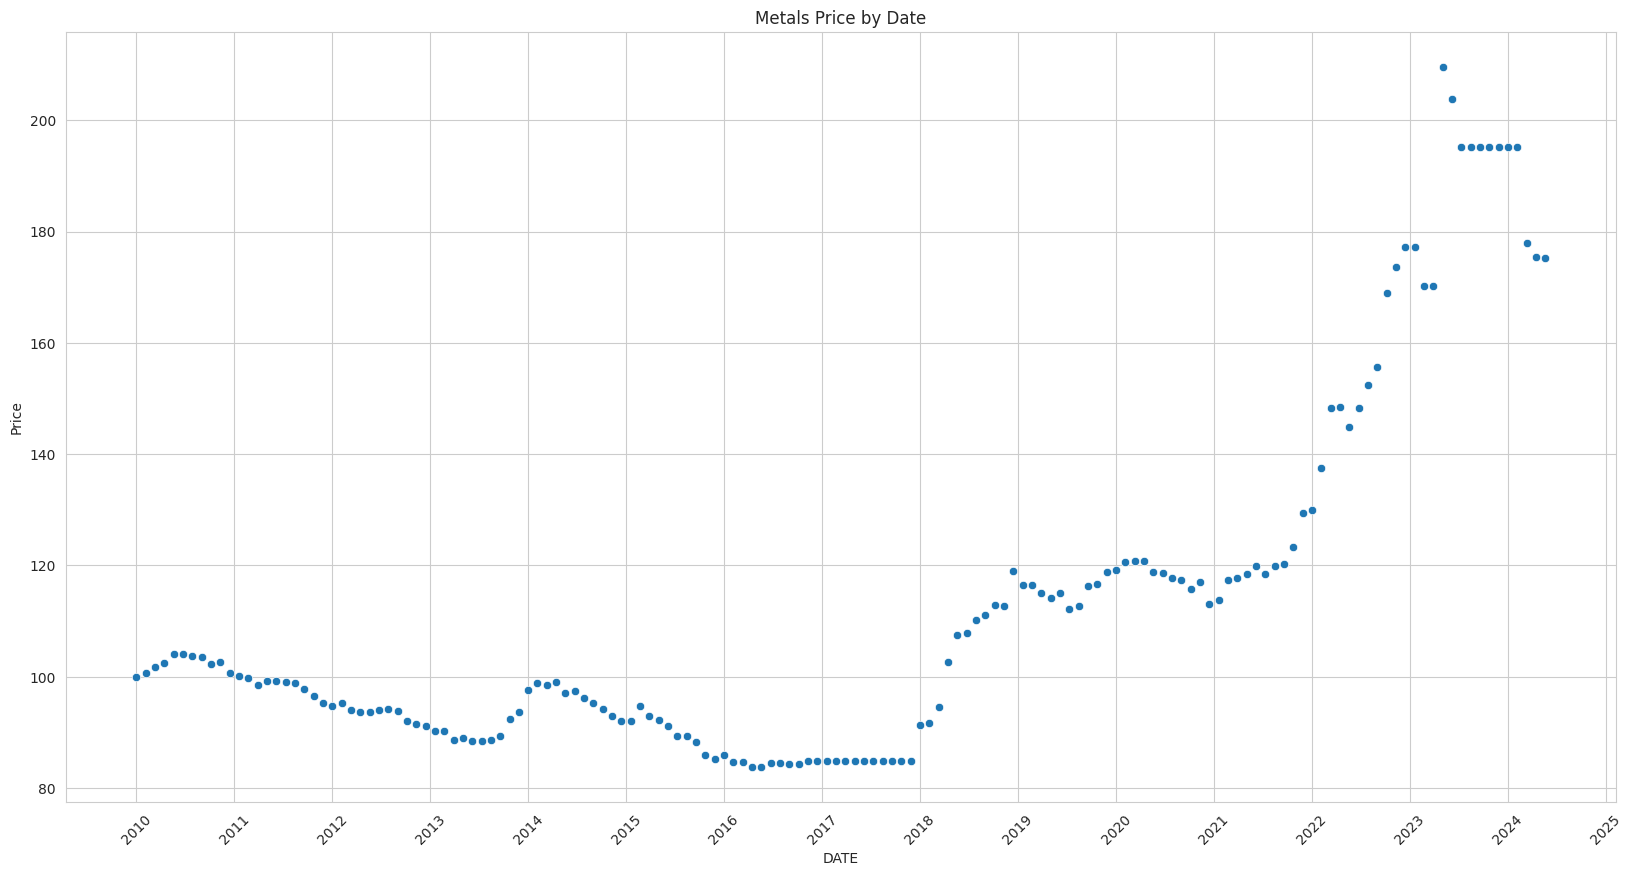

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 10.5, 21, 31.5, 42, 52.5, 63, 73.5, 84, 94.5, 105, 115.5, 126, 136.5, 147, 157.5],
           labels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Metals, x = PPI_Metals.columns[0], y = PPI_Metals.columns[1])
plt.title('Metals Price by Date')

The metals datset also shows large spikes, but it also shows that from 2010 to late 2013, the price was actually declining. Then after a small spike, it started decreasing again. The decreasing trend seemed to stop from 2018 until 2023, but it has starte decreasing again recently.

## Inflation Index
Now, our Inflation index.

Text(0.5, 1.0, 'Inflation Index by Date')

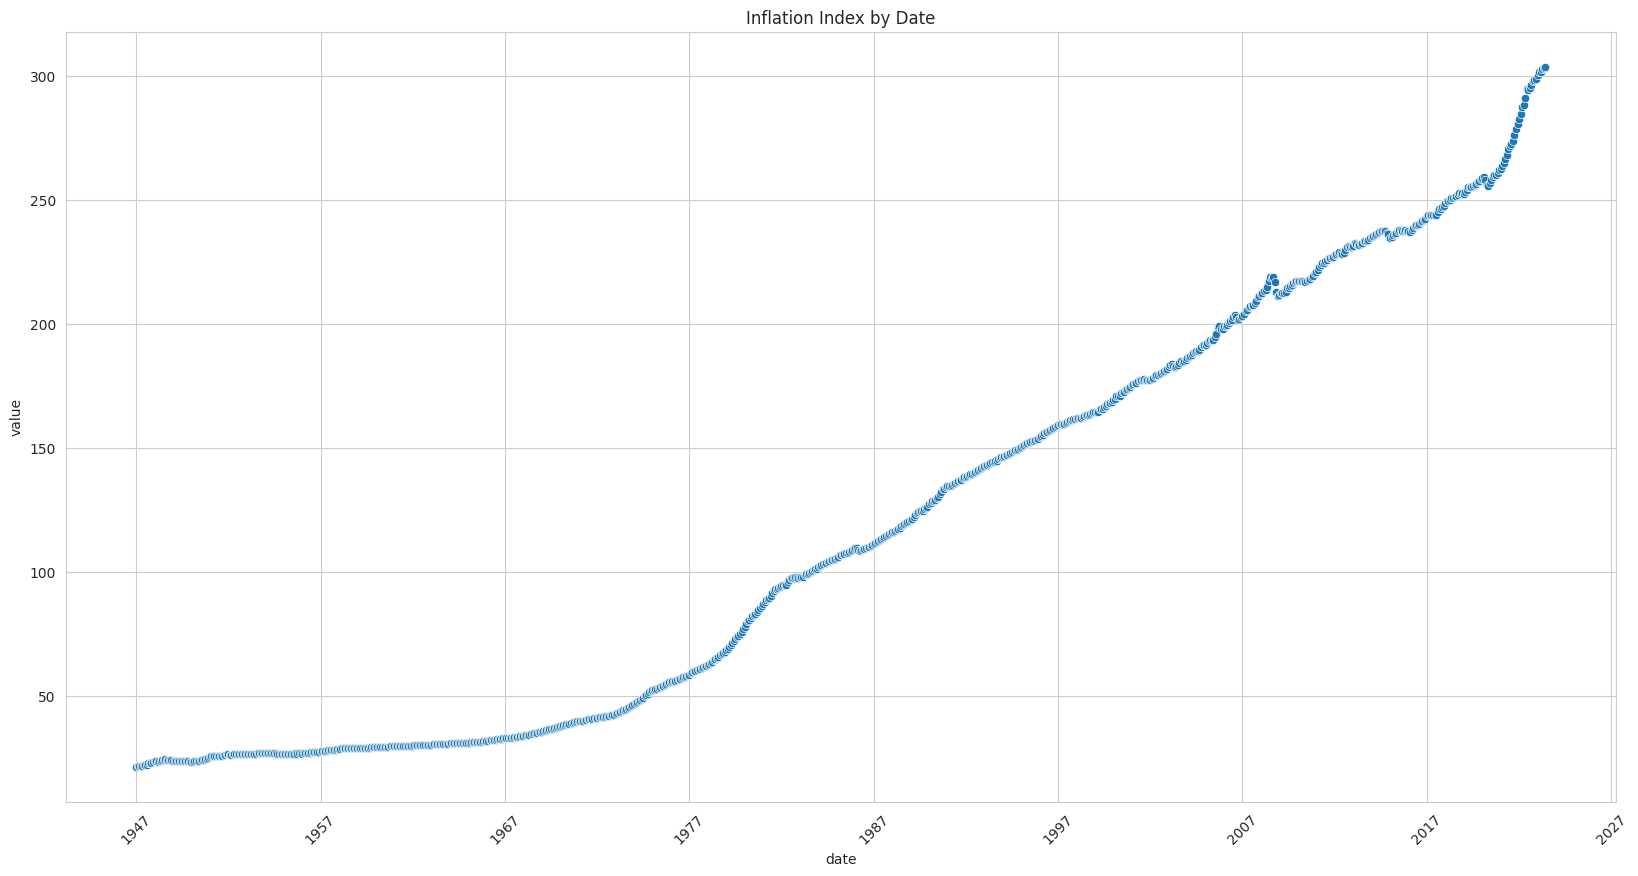

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(Inflation, x = Inflation.columns[0], y = Inflation.columns[1])
plt.title('Inflation Index by Date')

Inflation began recording datapoints in 1947 similar to PPI_Plumbing. It has no massive outliers and is fairly consistent in its price rise. The rate at which it increases does change on occasion, but it doesn't really show the massive spikes some of the other datasets showed.

## Commercial Real Estate
Now a scatter plot for our Commercial Real Estate dataset.

Text(0.5, 1.0, 'Real Estate Prices by Date')

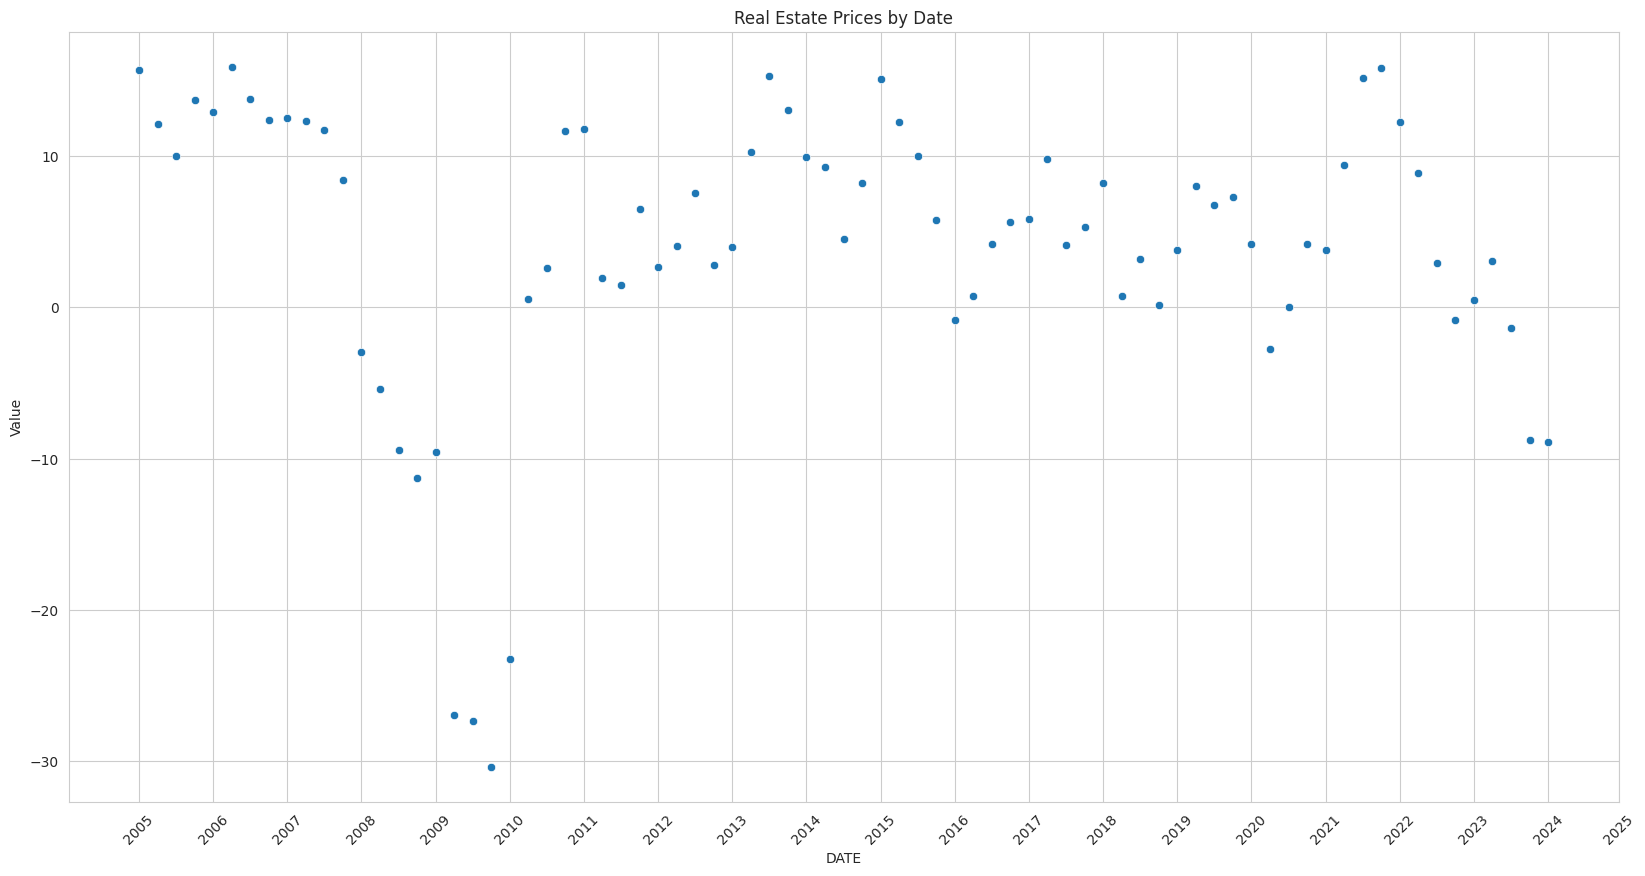

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 79.8],
           labels = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(ComRealPri, x = ComRealPri.columns[0], y = ComRealPri.columns[1])
plt.title('Real Estate Prices by Date')

This dataset is far less consistent than any of the other datasets. There is little grouping of points and values jump erratically. This is likely because the dataset is small and takes measurements less often that the others. One interesting detail about this dataset is it has a massive dip around 2008-2010, these could be considered outliers with how extreme some of them are, but I prefer to call them the 2008 mortgage crisis.

## Sticky Price
Lastly, we will scatter plot our Sticky Price dataset.

Text(0.5, 1.0, 'Sticky Price: Inflation by Date')

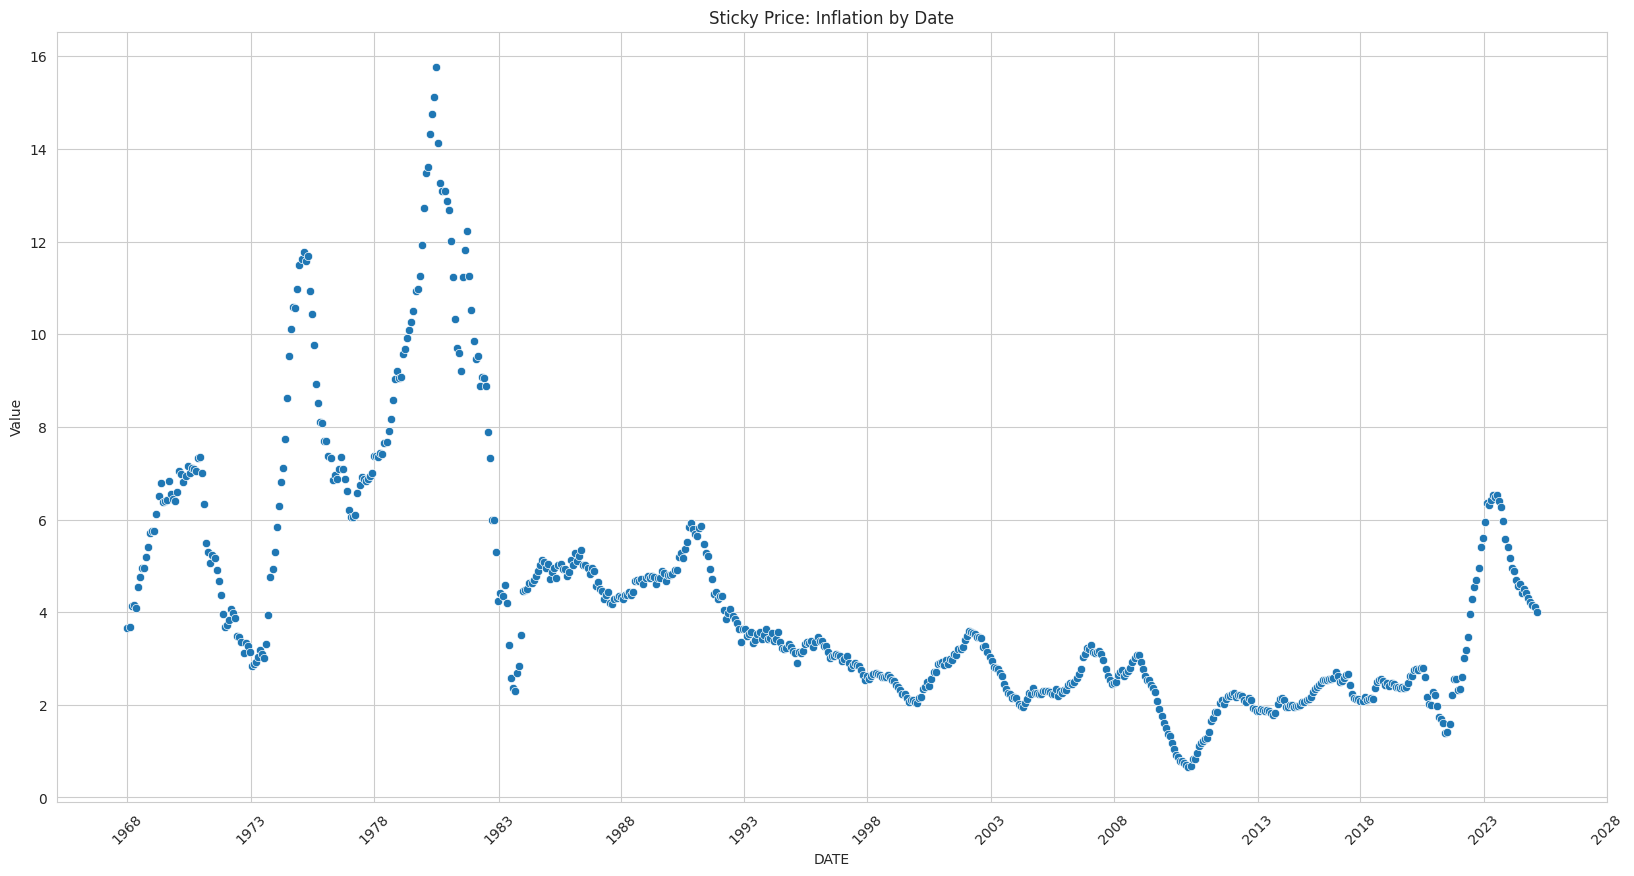

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 59.5, 119, 179.5, 238, 297.5, 357, 416.5, 476, 545.5, 595, 654.5, 714],
           labels = ["1968", "1973", "1978", "1983", "1988", "1993", "1998", "2003", "2008", "2013", "2018", "2023", "2028"])
sns.scatterplot(StickyPrice, x = StickyPrice.columns[0], y = StickyPrice.columns[1])
plt.title('Sticky Price: Inflation by Date')

Sticky price is the most erratic of the consistent datasets. It definitely follows a trend with multiple points going towards those trends, but it bounces up and down far more than the other datasets have.

## Conclusion
We have some good data to go through, although we will likely not use sticky price for anything but demonstrating the difference in graphs that are not indexed vs those that are. The majority of our datasets are indexs, which does make direct analysis a bit more difficult.